# Projet de Machine Learning

On s'intéresse au jeu de données 'Global data on sustainable energy' et plus précisément aux données liées au "Value_co2_emissions_kt_by_country"

On commence par importer les librairies nécessaires au projet ainsi que le jeu de données :

# Importation et visualisation du jeu de données 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('global-data-on-sustainable-energy (1).csv')

data.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density(P/Km2) Land Area(Km2)  Latitude  Longitude  
0              60       652230.0  33.93911  67.709953  
1              

On affiche les types des différentes variables, puis on transfome la variable 'Year' en variable qualitative. Aussi, on trouve intéressant de transformer le nom des pays en variable qualitative (category plutôt que object).

In [2]:
data.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [3]:
data["Year"]=pd.Categorical(data["Year"],ordered=False)
data["Entity"]=pd.Categorical(data["Entity"],ordered=False)
data.dtypes

Entity                                                              category
Year                                                                category
Access to electricity (% of population)                              float64
Access to clean fuels for cooking                                    float64
Renewable-electricity-generating-capacity-per-capita                 float64
Financial flows to developing countries (US $)                       float64
Renewable energy share in the total final energy consumption (%)     float64
Electricity from fossil fuels (TWh)                                  float64
Electricity from nuclear (TWh)                                       float64
Electricity from renewables (TWh)                                    float64
Low-carbon electricity (% electricity)                               float64
Primary energy consumption per capita (kWh/person)                   float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          float64

On met en forme les variables du dataset, par exemple dans la densité, certaines variables ont des ',' pour représenter des milliers :

In [4]:
print(data["Density(P/Km2)"][252:255])

data["Density(P/Km2)"] = data["Density(P/Km2)"].apply(lambda x : float(x.replace(',','')) if type(x)==str else x)

print(data["Density(P/Km2)"][252:255])

data.dtypes

252    2,239
253    2,239
254    2,239
Name: Density(P/Km2), dtype: object
252    2239.0
253    2239.0
254    2239.0
Name: Density(P/Km2), dtype: float64


Entity                                                              category
Year                                                                category
Access to electricity (% of population)                              float64
Access to clean fuels for cooking                                    float64
Renewable-electricity-generating-capacity-per-capita                 float64
Financial flows to developing countries (US $)                       float64
Renewable energy share in the total final energy consumption (%)     float64
Electricity from fossil fuels (TWh)                                  float64
Electricity from nuclear (TWh)                                       float64
Electricity from renewables (TWh)                                    float64
Low-carbon electricity (% electricity)                               float64
Primary energy consumption per capita (kWh/person)                   float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          float64

On va regarder le nombre de valeurs manquantes :

In [5]:
nb_data_missing = data.isna().sum()
taux_data_missing = nb_data_missing/len(data)
print(nb_data_missing)
print()
print(taux_data_missing)

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

On obtient bien que les variables "Renewable-electricity-generating-capacity-per-capita", "Financial flows to developing countries (US $)"et "Renewables (% equivalent primary energy)" comportent le plus de variables manquantes.

In [6]:
data = data.drop(labels=["Renewable-electricity-generating-capacity-per-capita",
                  "Financial flows to developing countries (US $)",
                  "Renewables (% equivalent primary energy)"],
          axis='columns')

data.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                               0.31                               65.957440   
1                               0.50                               84.745766   
2                               0.56                               81.159424   
3                               0.63                               67.021280   
4                               0.56                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
0                         760.000000         NaN             NaN   
1                         730.000000         NaN             NaN   
2                        1029.999971         NaN      179.426579   
3                        1220.000029    8.832278      190.683814   
4                        1029.999971    1.414118      211.382074   

   Density(P/Km2)  Land Area(Km2)  Latitude  Longitude  
0            60.0        652230.0  33.93911  67.709953  
1            60.0        652230.0  33.93911  67.709953  
2            60.0        652230.0  33.93911  67.709953  
3            60.0        652230.0  33.93911  67.709953  
4            60.0        652230.0  33.93911  67.709953

On crée un nouveau jeu de données, qui ne comportent pas les trois colonnes précédentes et on supprime également toutes les lignes qui comportent des données manquantes.

On obtient alors un dataframe avec 2868 observations (lignes)

In [7]:
data = data.dropna()
data.head()

Entity  Year  Access to electricity (% of population)  \
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   
5  Afghanistan  2005                                25.390894   
6  Afghanistan  2006                                30.718690   
7  Afghanistan  2007                                36.051010   

   Access to clean fuels for cooking  \
3                               9.50   
4                              10.90   
5                              12.20   
6                              13.85   
7                              15.30   

   Renewable energy share in the total final energy consumption (%)  \
3                                              36.66                  
4                                              44.24                  
5                                              33.88                  
6                                              31.89                  
7                                              28.78                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
3                                 0.31                             0.0   
4                                 0.33                             0.0   
5                                 0.34                             0.0   
6                                 0.20                             0.0   
7                                 0.20                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
3                               0.63                               67.021280   
4                               0.56                               62.921350   
5                               0.59                               63.440857   
6                               0.64                               76.190475   
7                               0.75                               78.947370   

   Primary energy consumption per capita (kWh/person)  \
3                                          229.96822    
4                                          204.23125    
5                                          252.06912    
6                                          304.42090    
7                                          354.27990    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
3                                               1.40             
4                                               1.20             
5                                               1.41             
6                                               1.50             
7                                               1.53             

   Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
3                        1220.000029    8.832278      190.683814   
4                        1029.999971    1.414118      211.382074   
5                        1549.999952   11.229715      242.031313   
6                        1759.999990    5.357403      263.733602   
7                        1769.999981   13.826320      359.693158   

   Density(P/Km2)  Land Area(Km2)  Latitude  Longitude  
3            60.0        652230.0  33.93911  67.709953  
4            60.0        652230.0  33.93911  67.709953  
5            60.0        652230.0  33.93911  67.709953  
6            60.0        652230.0  33.93911  67.709953  
7            60.0        652230.0  33.93911  67.709953

# Analyse élémentaire : Statistiques unidimensionnels

On étudie ici les variables sous la forme d'histogrammes, de boxplot et on observe différentes transformations des données pour optimiser leurs affichages.

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
import numpy as np


means = data.mean(numeric_only=True)
means.head()

data.describe()

Access to electricity (% of population)  \
count                              2868.000000   
mean                                 76.584630   
std                                  31.510371   
min                                   1.252269   
25%                                  53.237811   
50%                                  97.000000   
75%                                 100.000000   
max                                 100.000000   

       Access to clean fuels for cooking  \
count                        2868.000000   
mean                           62.170084   
std                            39.238548   
min                             0.000000   
25%                            22.075000   
50%                            81.550000   
75%                           100.000000   
max                           100.000000   

       Renewable energy share in the total final energy consumption (%)  \
count                                        2868.000000                  
mean                                           35.802071                  
std                                            30.024000                  
min                                             0.000000                  
25%                                             9.187500                  
50%                                            28.790000                  
75%                                            60.667500                  
max                                            96.040000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                          2868.000000                     2868.000000   
mean                             76.693556                       15.337019   
std                             374.419806                       78.776075   
min                               0.000000                        0.000000   
25%                               0.290000                        0.000000   
50%                               2.995000                        0.000000   
75%                              25.787500                        0.000000   
max                            5098.220000                      809.410000   

       Electricity from renewables (TWh)  \
count                        2868.000000   
mean                           26.603375   
std                           107.640273   
min                             0.000000   
25%                             0.090000   
50%                             1.680000   
75%                            10.102500   
max                          2014.570000   

       Low-carbon electricity (% electricity)  \
count                             2868.000000   
mean                                39.629403   
std                                 34.454884   
min                                  0.000000   
25%                                  6.091074   
50%                                 35.009718   
75%                                 66.879318   
max                                100.000010   

       Primary energy consumption per capita (kWh/person)  \
count                                        2868.000000    
mean                                        26082.456843    
std                                         37097.457254    
min                                           105.110120    
25%                                          2779.966525    
50%                                         11922.761000    
75%                                         31838.556000    
max                                        262585.700000    

       Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
count                                        2868.000000             
mean                                            5.418111             
std                                             3.577415             
min                                             1.030000             
25%                                      

0.0


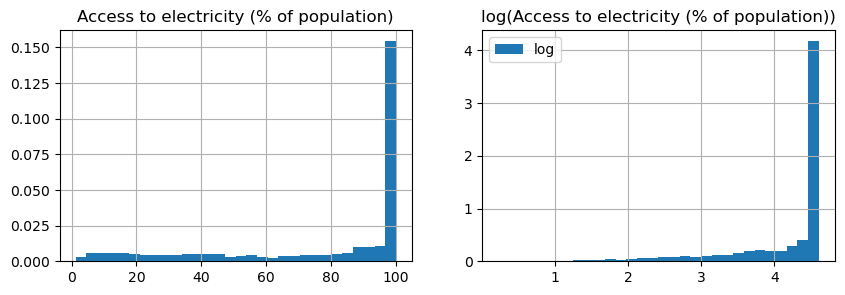

0.1


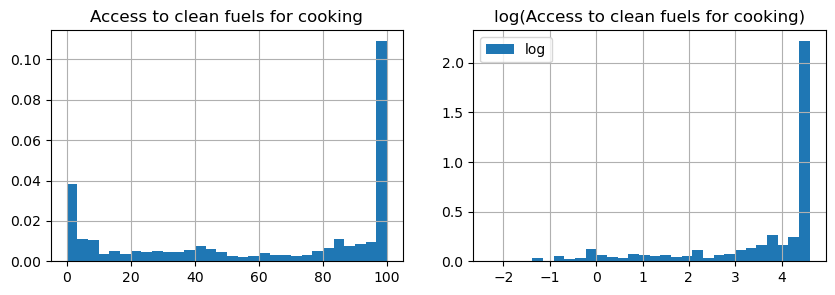

0.1


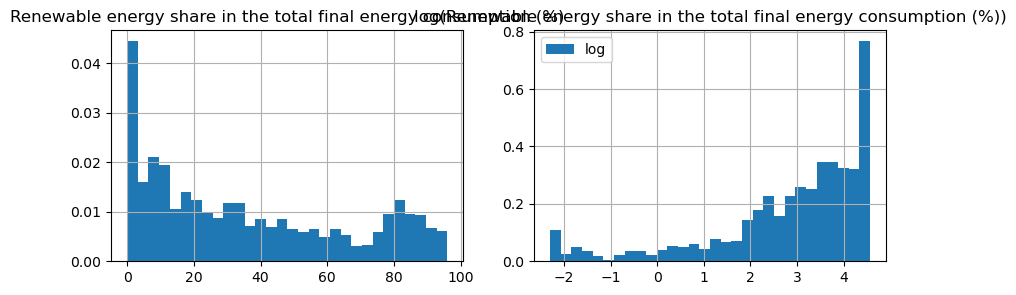

0.1


0.1


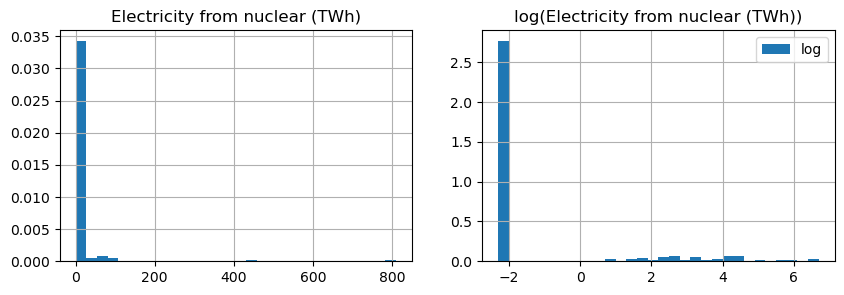

0.1


0.1


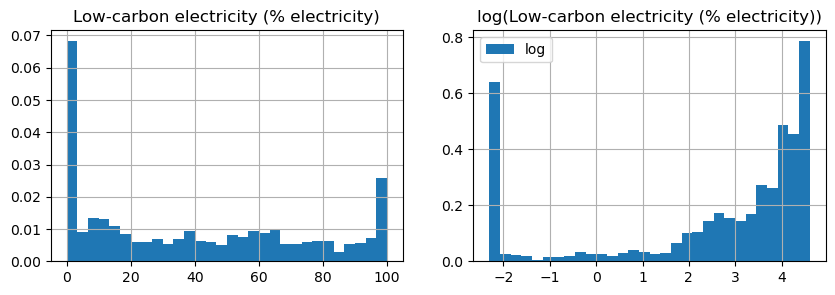

0.0


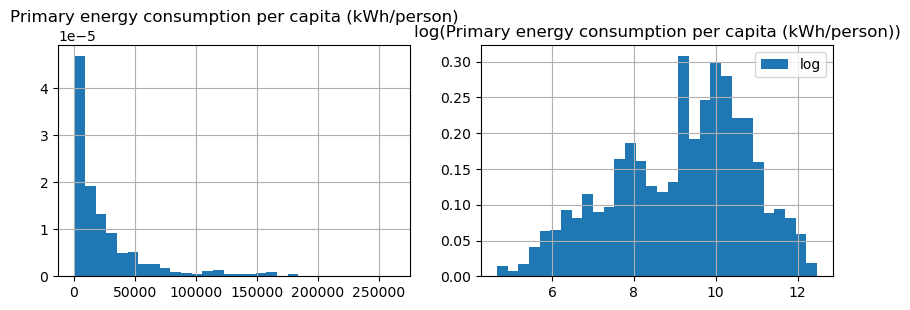

0.0


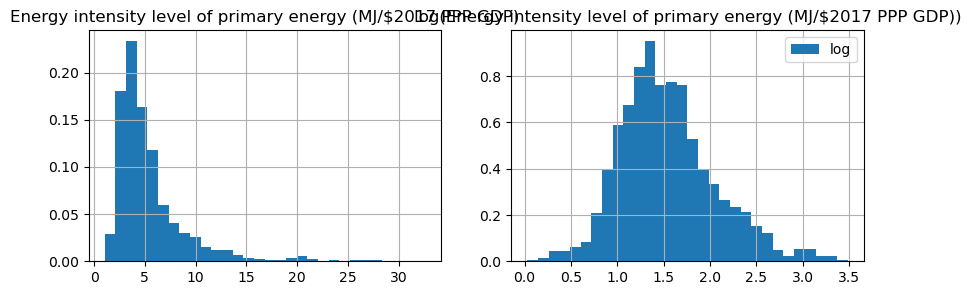

0.0


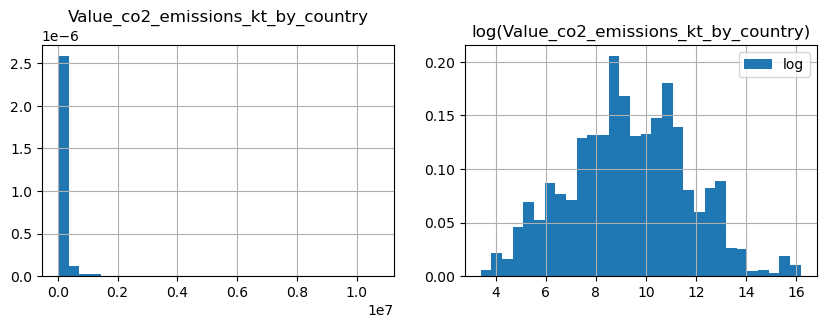

0.1


/usr/local/insa/anaconda/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


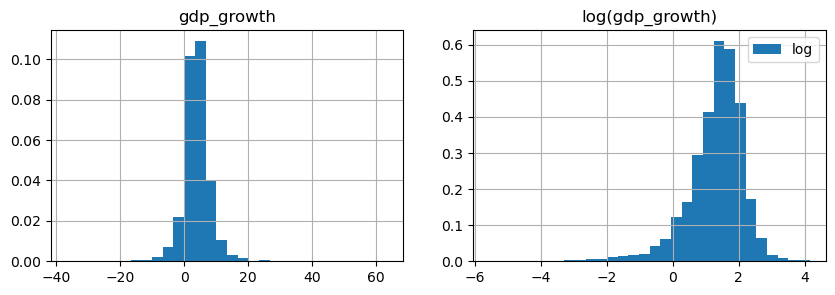

0.0


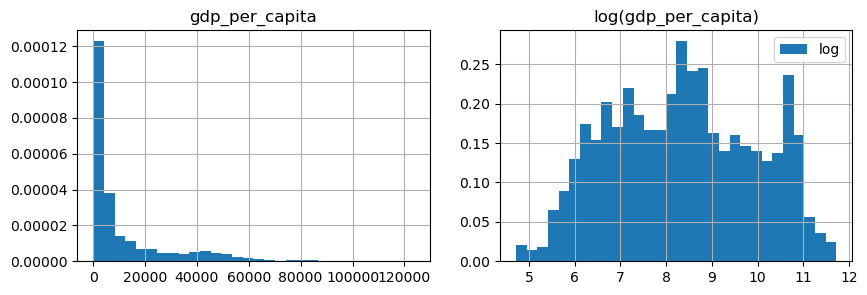

0.0


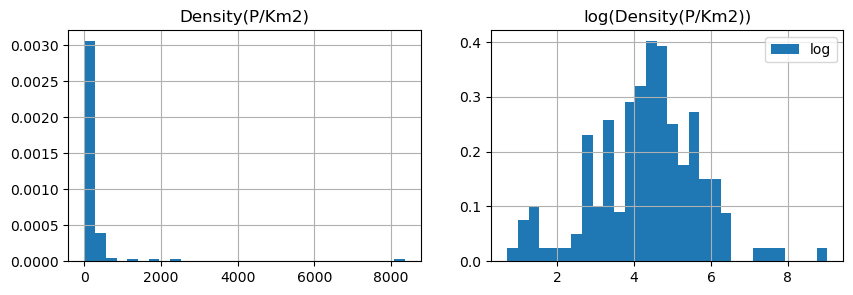

0.0


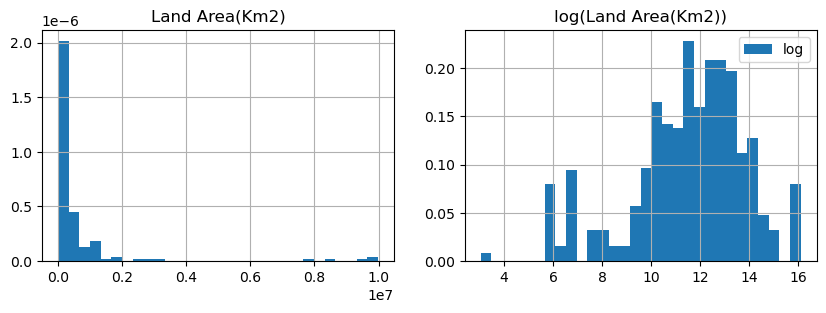

0.1


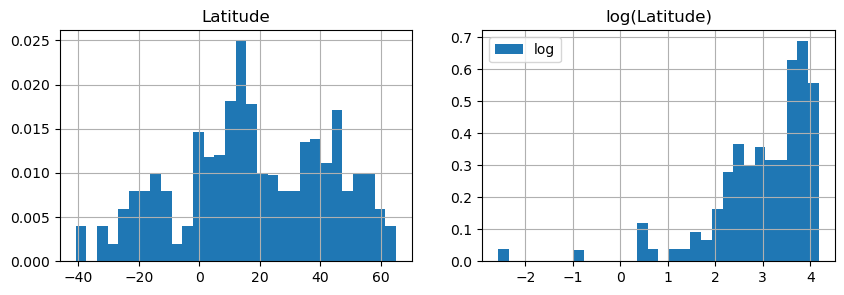

0.1


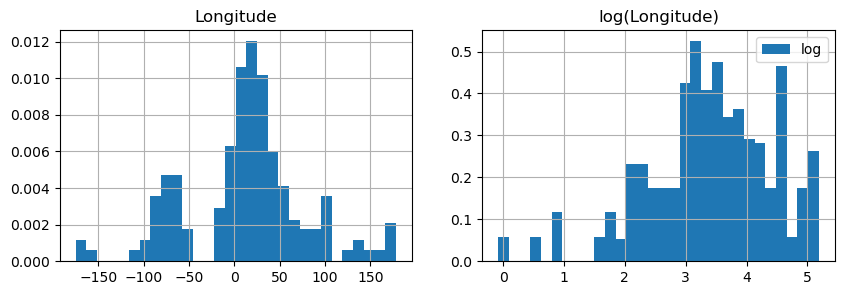

In [10]:
interesting_columns = [col for col in data.columns if col not in ['Entity', 'Year']]

nbins = 30

for column_to_test in interesting_columns :
    eps = (min(data[column_to_test]) <= 0) * 0.1
    print(eps)
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    data[column_to_test].hist(density=True,label='donnée',bins=nbins)
    plt.title(column_to_test)
    plt.subplot(1,2,2)
    np.log(data[column_to_test] + eps).hist(density=True,label='log',bins=nbins)
    plt.title('log(' + column_to_test + ')')
    plt.legend()
    plt.show()

#idée à garder : faire des dépassements de seuils

In [11]:
column_log = ['Primary energy consumption per capita (kWh/person)',
              'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
              'Value_co2_emissions_kt_by_country',
              'gdp_per_capita',
              'Density(P/Km2)',
              'Land Area(Km2)']

for column in column_log :
    data[column] = np.log(data[column])

data.head()

Entity  Year  Access to electricity (% of population)  \
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   
5  Afghanistan  2005                                25.390894   
6  Afghanistan  2006                                30.718690   
7  Afghanistan  2007                                36.051010   

   Access to clean fuels for cooking  \
3                               9.50   
4                              10.90   
5                              12.20   
6                              13.85   
7                              15.30   

   Renewable energy share in the total final energy consumption (%)  \
3                                              36.66                  
4                                              44.24                  
5                                              33.88                  
6                                              31.89                  
7                                              28.78                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
3                                 0.31                             0.0   
4                                 0.33                             0.0   
5                                 0.34                             0.0   
6                                 0.20                             0.0   
7                                 0.20                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
3                               0.63                               67.021280   
4                               0.56                               62.921350   
5                               0.59                               63.440857   
6                               0.64                               76.190475   
7                               0.75                               78.947370   

   Primary energy consumption per capita (kWh/person)  \
3                                           5.437941    
4                                           5.319253    
5                                           5.529703    
6                                           5.718411    
7                                           5.870087    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
3                                           0.336472             
4                                           0.182322             
5                                           0.343590             
6                                           0.405465             
7                                           0.425268             

   Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
3                           7.106606    8.832278        5.250617   
4                           6.937314    1.414118        5.353667   
5                           7.346010   11.229715        5.489067   
6                           7.473069    5.357403        5.574940   
7                           7.478735   13.826320        5.885251   

   Density(P/Km2)  Land Area(Km2)  Latitude  Longitude  
3        4.094345       13.388153  33.93911  67.709953  
4        4.094345       13.388153  33.93911  67.709953  
5        4.094345       13.388153  33.93911  67.709953  
6        4.094345       13.388153  33.93911  67.709953  
7        4.094345       13.388153  33.93911  67.709953

column_log = ['Primary energy consumption per capita (kWh/person)',
              'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
              'Value_co2_emissions_kt_by_country',
              'gdp_per_capita',
              'Density(P/Km2)',
              'Land Area(Km2)']

for column in column_log :
    data[column] = np.log(data[column])

data.head()

On affiche également les statistiques descriptives des données pour avoir une idée des moyennes, médiane et quantile. Cela peut notamment nous aider pour savoir vers quelles transformations , il est préférable d'aller .
//A mettre avant les histogrammes

boxplot à faire 

['Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita', 'Density(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']


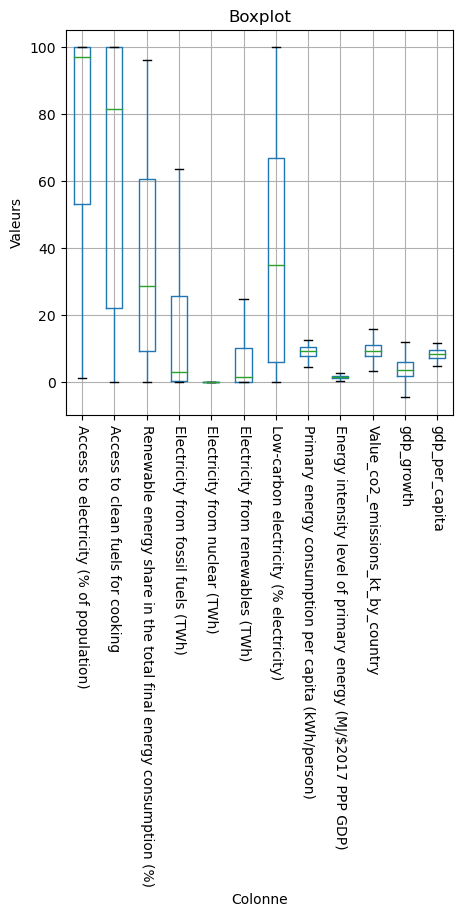

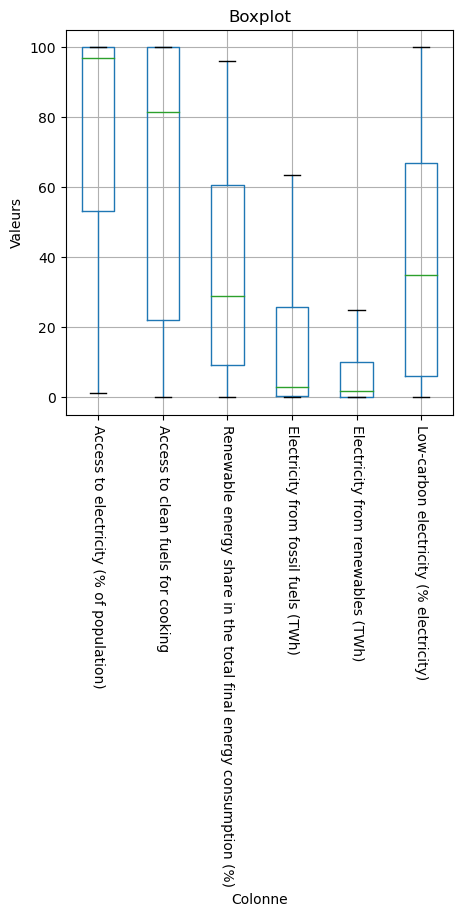

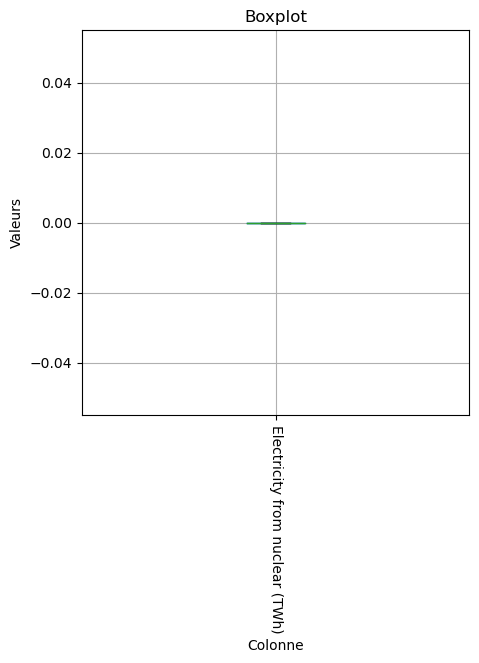

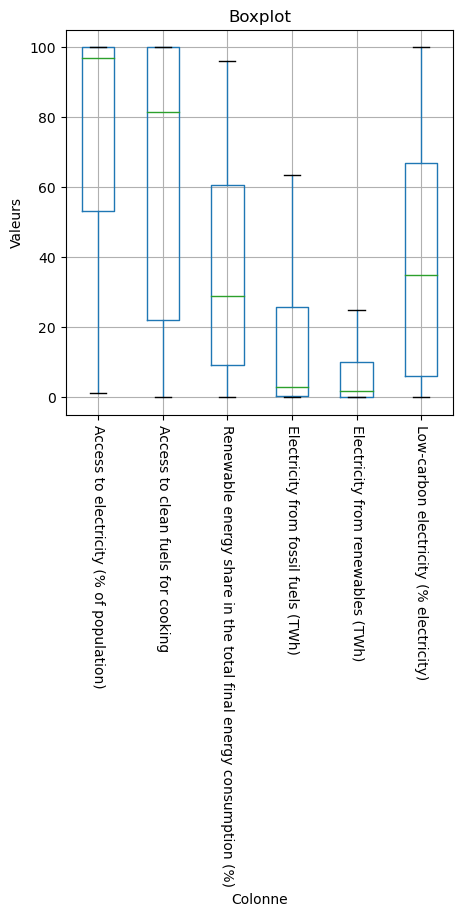

In [12]:
interesting_columns = ["Access to electricity (% of population)",
                       "Access to clean fuels for cooking",
                       "Renewable energy share in the total final energy consumption (%)",
                       "Electricity from fossil fuels (TWh)",
                       "Electricity from nuclear (TWh)",
                       "Electricity from renewables (TWh)",
                       "Low-carbon electricity (% electricity)",
                       "Primary energy consumption per capita (kWh/person)",
                       "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
                       "Value_co2_emissions_kt_by_country",
                       "gdp_growth",
                       "gdp_per_capita"]

interesting_columns2 = [col for col in data.columns if col not in ['Entity', 'Year']]

print(interesting_columns2)
"""
for column in interesting_columns:
    plt.figure(figsize=(3,3))
    plt.boxplot(data[column],showfliers=False)
    plt.title(f'Boxplot de la colonne {column}')
    plt.xlabel('Colonne')
    plt.ylabel('Valeurs')
    plt.show()"""

plt.figure(figsize=(5,5))
data.boxplot(interesting_columns,showfliers=False)
plt.title('Boxplot')
plt.xticks(rotation=-90)
plt.xlabel('Colonne')
plt.ylabel('Valeurs')
plt.show()

plt.figure(figsize=(5,5))
data.boxplot(interesting_columns[:4]+interesting_columns[5:7]+interesting_columns[8:8]+interesting_columns[10:10],showfliers=False)
plt.title('Boxplot')
plt.xticks(rotation=-90)
plt.xlabel('Colonne')
plt.ylabel('Valeurs')
plt.show()

plt.figure(figsize=(5,5))
data.boxplot(interesting_columns[4],showfliers=False)
plt.title('Boxplot')
plt.xticks(rotation=-90)
plt.xlabel('Colonne')
plt.ylabel('Valeurs')
plt.show()

plt.figure(figsize=(5,5))
#data.boxplot(interesting_columns[7:7]+interesting_columns[9:9]+interesting_columns[11:11],showfliers=False)
data.boxplot(interesting_columns[:4]+interesting_columns[5:7]+interesting_columns[8:8]+interesting_columns[10:10],showfliers=False)
plt.title('Boxplot')
plt.xticks(rotation=-90)
plt.xlabel('Colonne')
plt.ylabel('Valeurs')
plt.show()

In [13]:
emissions_par_pays = data.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum().sort_values(ascending=False)
print(emissions_par_pays)

emissions_par_pays = emissions_par_pays.reset_index() #passer d'une série à uin dataframe

top_5_emission = emissions_par_pays["Entity"][:5]
print(top_5_emission)

Entity
China                               315.661525
United States                       309.731673
India                               285.045575
Japan                               279.668338
Germany                             271.137713
                                       ...    
Saint Lucia                           0.000000
Saint Vincent and the Grenadines      0.000000
Saudi Arabia                          0.000000
Slovakia                              0.000000
Congo                                 0.000000
Name: Value_co2_emissions_kt_by_country, Length: 176, dtype: float64
0            China
1    United States
2            India
3            Japan
4          Germany
Name: Entity, dtype: category
Categories (176, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'Vanuatu', 'Yemen', 'Zambia', 'Zimbabwe']


### Exploration multidimensionnelle

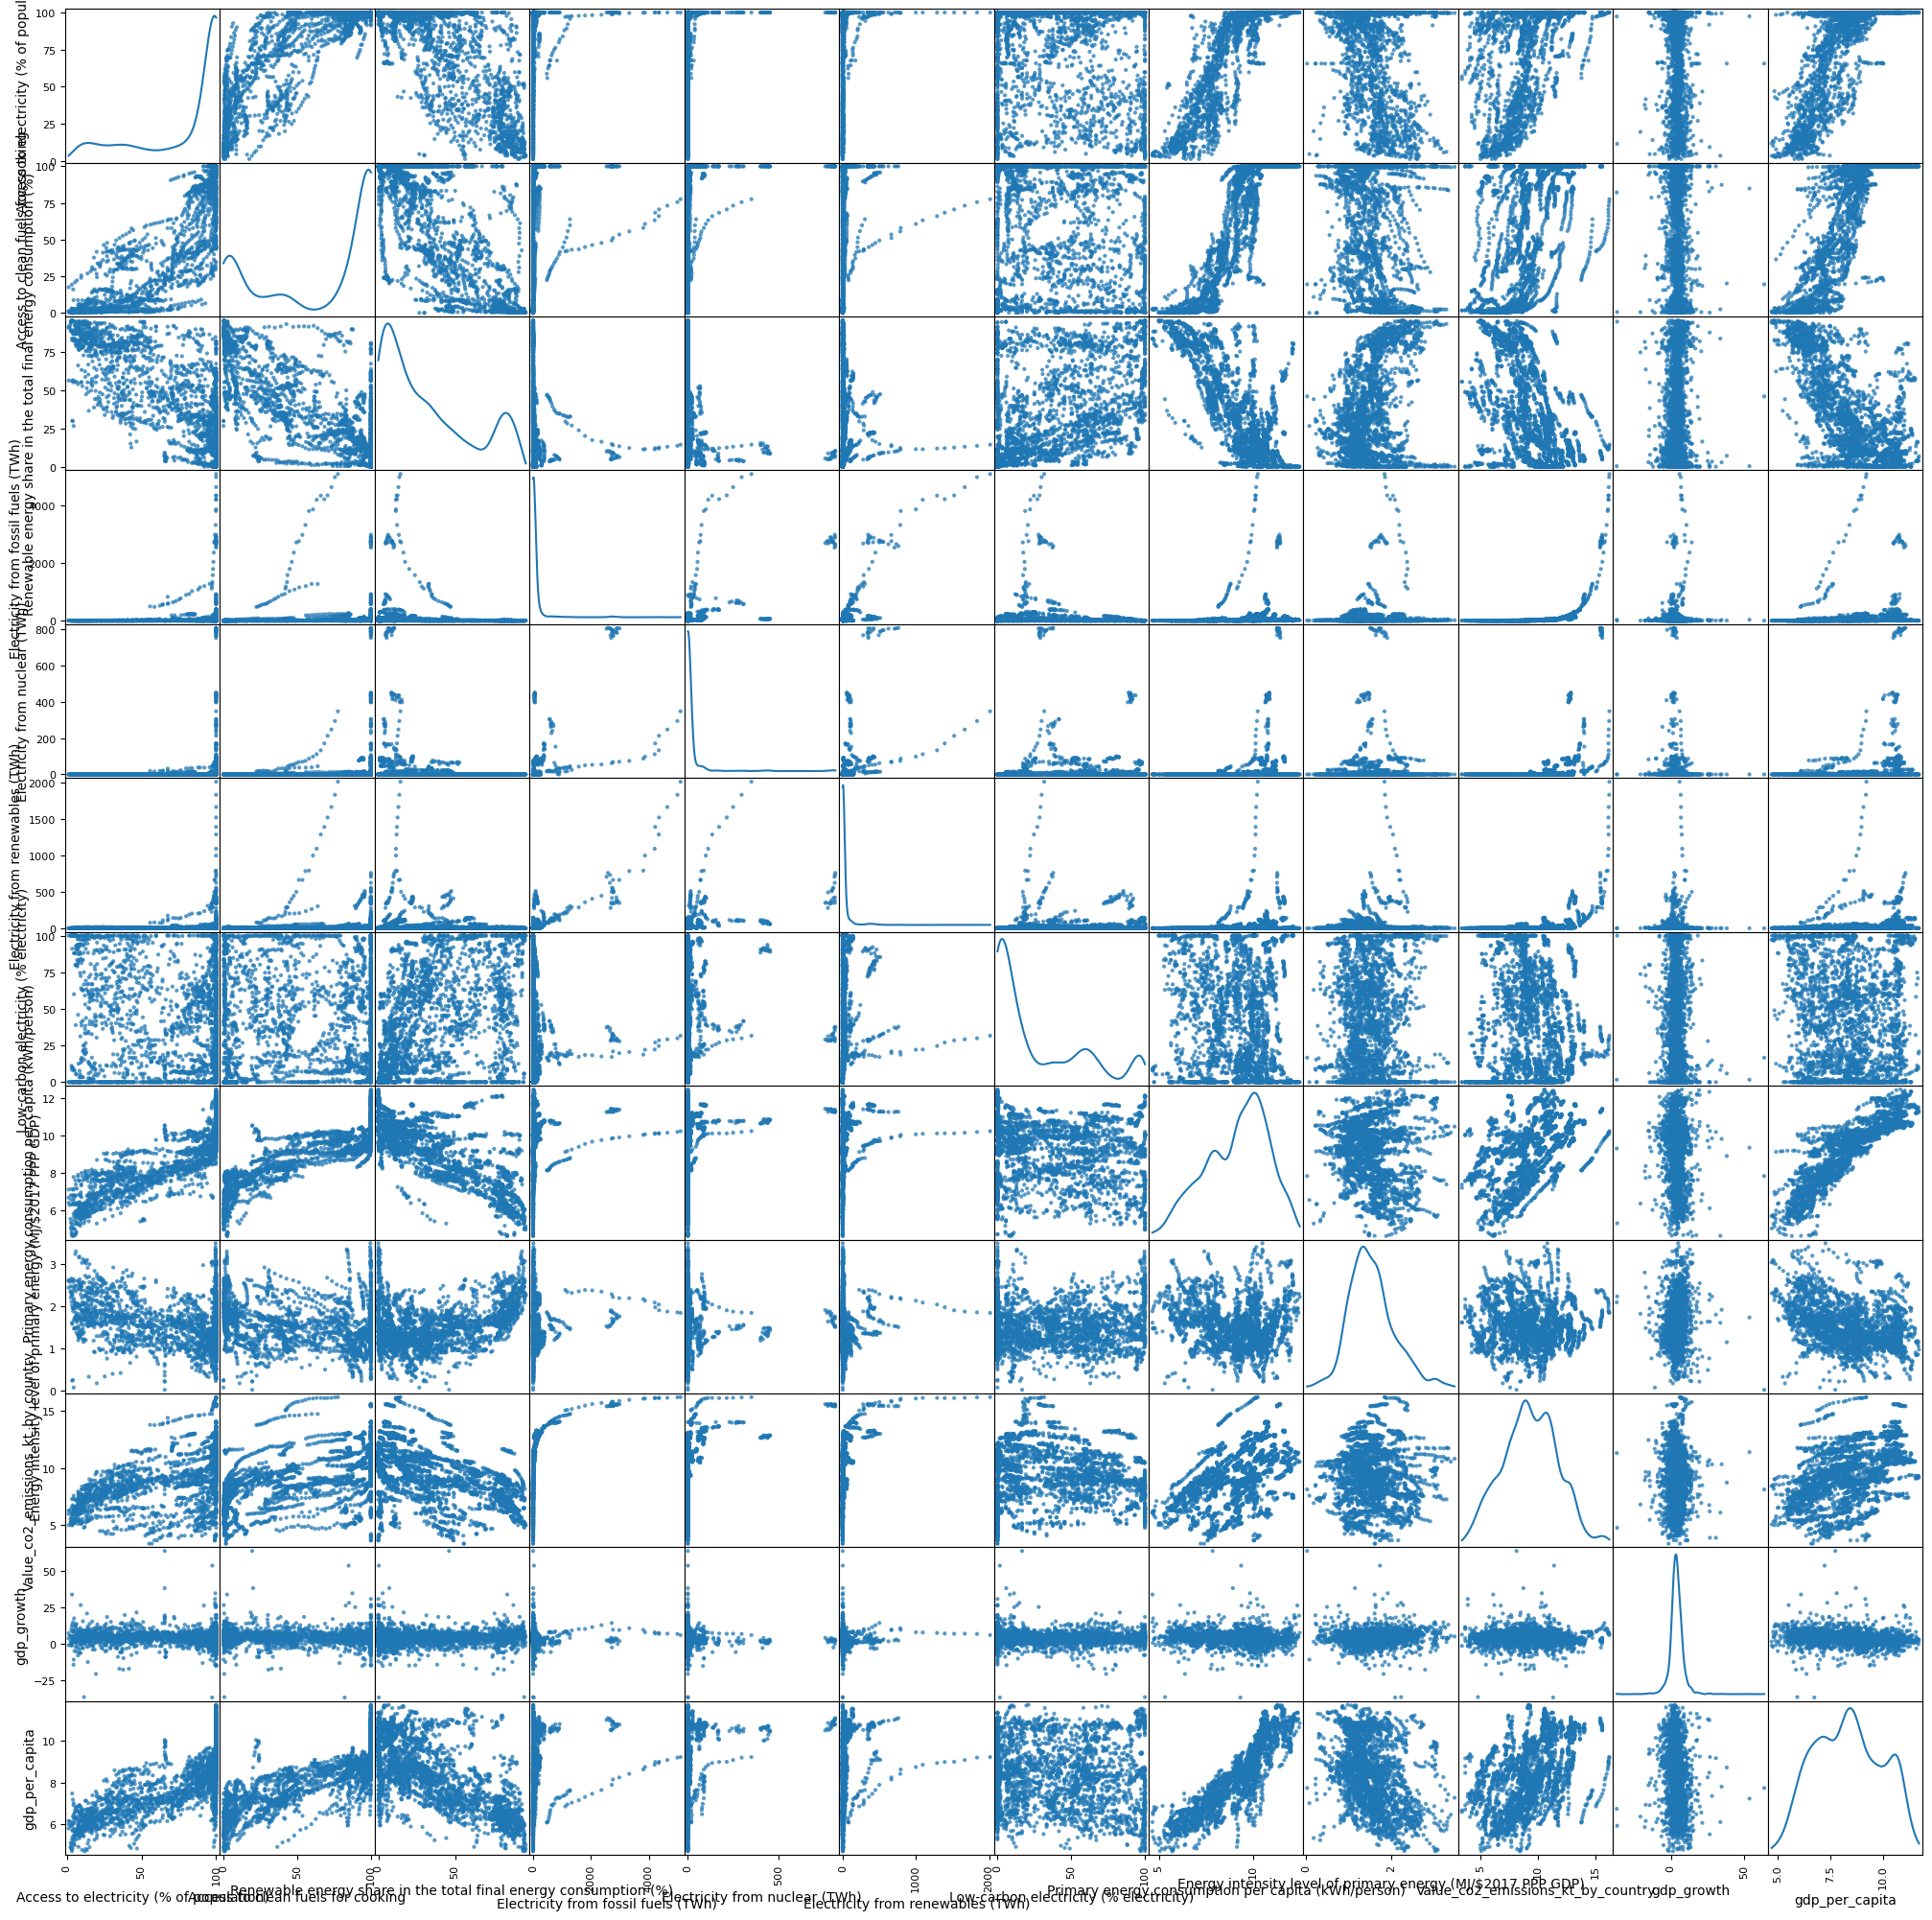

In [14]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix


scatter_matrix(data[interesting_columns], alpha=0.75, 
               figsize=(25, 25), diagonal='kde')
plt.show()

On étudie la corrélation entre les variables en calculant la matrice de corrélation.

In [15]:
data_quantitative = data.select_dtypes(include=['number'])

#print(data_quantitative)
# Calcul de la matrice de corrélation
corr_matrix = data_quantitative.corr()
"""corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(3) #Affiche la matrice de corrélation et ne garde que 3 chiffres après la virgule"""

"corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(3) #Affiche la matrice de corrélation et ne garde que 3 chiffres après la virgule"

Analyse des corrélations : on voit une forte corrélation entre la variable "Value_co2_emissions_kt_by_country" et "Electricity from fossil fuels (TWh)"

# Analyse en composantes principales des variables quantitatives 

Tout d'abord on peut s'intéresser s'il faut ou non standardiser les données avant de faire l'analyse en composantes principales. 

Pour cela nous affichons les différents boxplots des variables quantitatives sur la même échelle : 

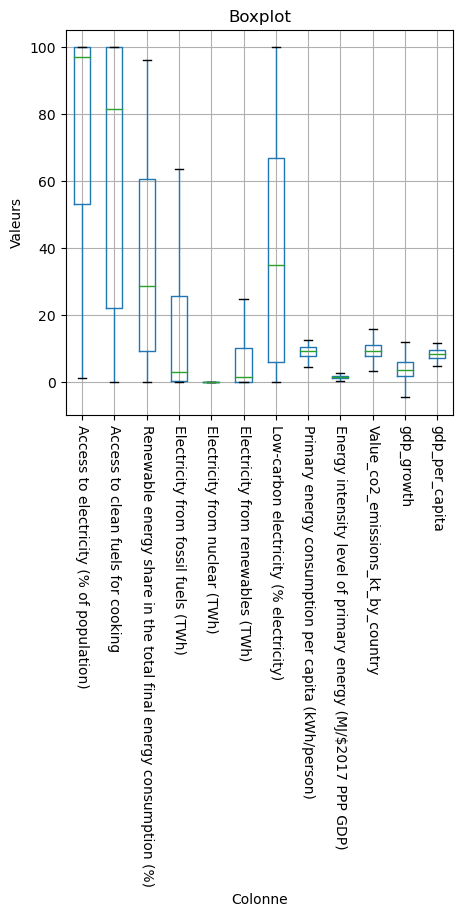

In [16]:
plt.figure(figsize=(5,5))
data.boxplot(interesting_columns,showfliers=False)
plt.title('Boxplot')
plt.xticks(rotation=-90)
plt.xlabel('Colonne')
plt.ylabel('Valeurs')
plt.show()

On observe facilement que toutes les variables ne possèdent pas la même échelle, il est donc intéressant de standardiser les données 

# Standardisation des données

In [17]:
from sklearn.preprocessing import StandardScaler

# Supposons que votre DataFrame s'appelle df et que les colonnes qualitatives sont 'col_qualitative_1' et 'col_qualitative_2'
# et les colonnes quantitatives sont le reste

# Sélectionner les colonnes quantitatives
colonnes_quantitatives = [col for col in data.columns if col not in ['Entity', 'Year']]

# Créer un nouvel DataFrame avec seulement les colonnes quantitatives
data_quantitatif = data[colonnes_quantitatives]

# Standardiser les données quantitatives
scaler = StandardScaler()
data_quantitatif_standardise = scaler.fit_transform(data_quantitatif)

# Créer un nouveau DataFrame avec les données standardisées et seulement les variables quantitatives!
data_standardise = pd.DataFrame(data_quantitatif_standardise, columns=colonnes_quantitatives)


# Concaténer les colonnes qualitatives avec les données standardisées
#df_final = pd.concat([df[['col_qualitative_1', 'col_qualitative_2']], df_standardise], axis=1)

# Afficher le DataFrame final avec les variables standardisées pour les colonnes quantitatives
#print(df_final)


<Figure size 640x480 with 0 Axes>

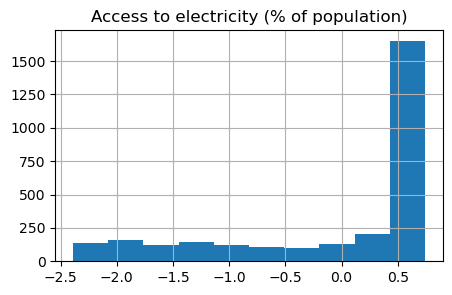

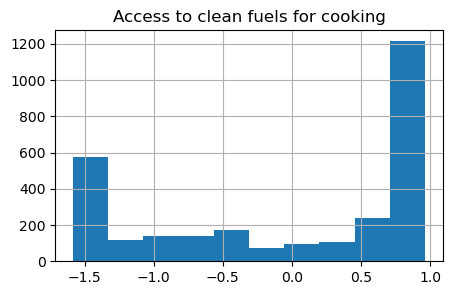

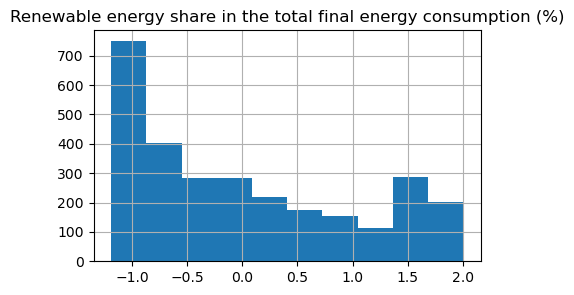

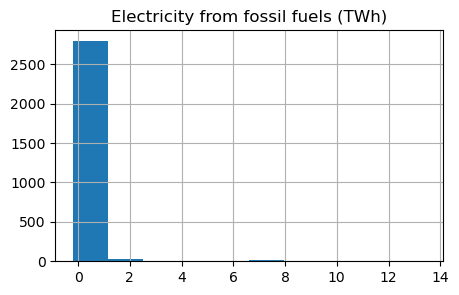

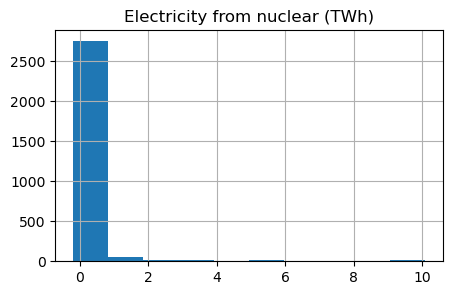

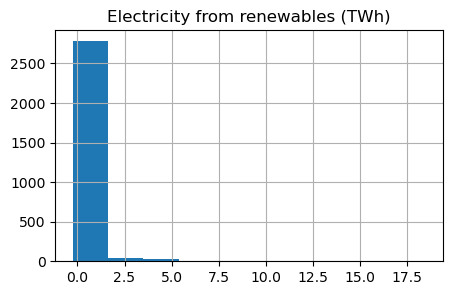

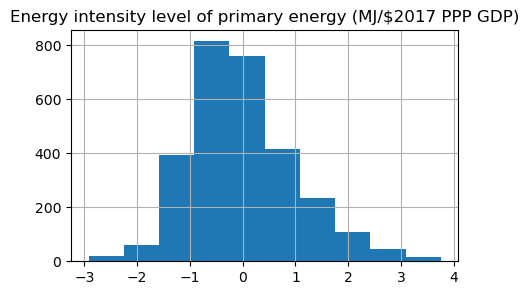

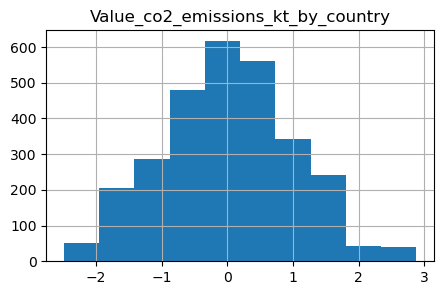

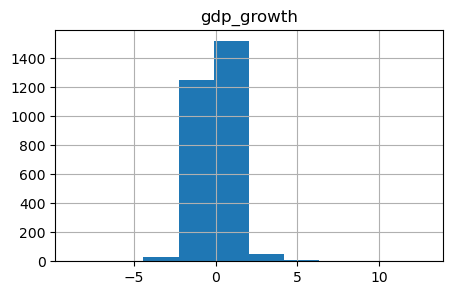

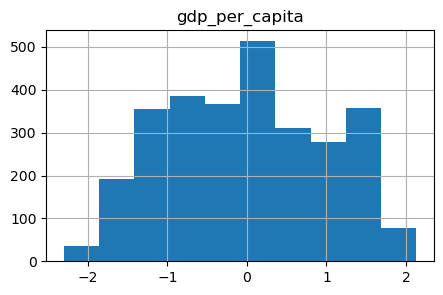

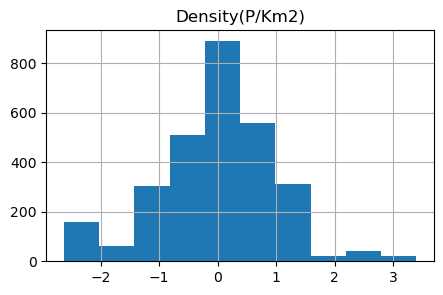

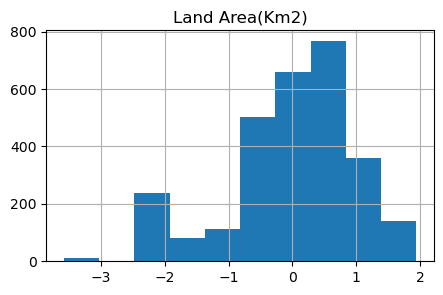

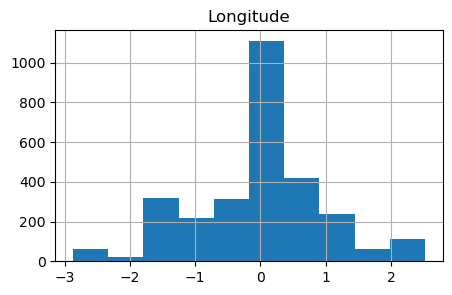

In [18]:
#juste pour tester si diff
plt.figure()

for col in colonnes_quantitatives :
    plt.figure(figsize=(5,3))
    plt.title(col)
   # if min(data[column_to_test]) <= 0 :
    data_standardise[col].hist(label='donnée')
        


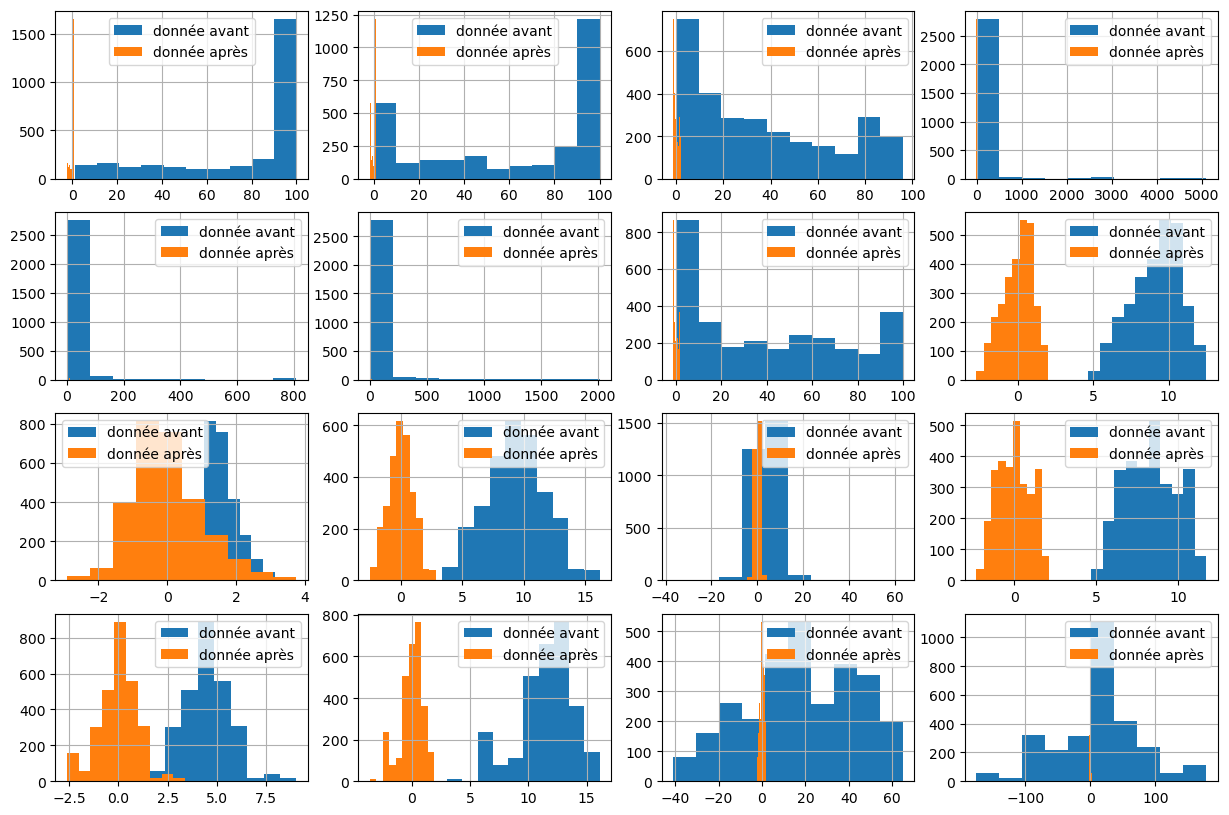

In [19]:
#je veux afficher sur le meme histogramme les valeurs normales & apres standardisation
num_cols = len(colonnes_quantitatives)

plt.figure(figsize=(15,10))

# Créer une figure pour les histogrammes
for i, col in enumerate(colonnes_quantitatives):
    # Histogramme avant standardisation
    plt.subplot(4, 4, i+1)
    data[col].hist(label='donnée avant')
    #plt.title(col)
    
    # Histogramme après standardisation
    data_standardise[col].hist(label='donnée après')
    #print(data_standardise[col])
    plt.legend()
# Ajuster la disposition des sous-graphiques
#plt.tight_layout()

# Afficher le graphique
plt.show()


### PCA 

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns


On affiche une courbe qui nous permet d'obtenir le nombre de variables qui expliquent au mieux la variance, on a également le boxplot des 10 première composantes et un histogramme qui permet de représenter la proportion que chaque composante de l'ACP représente. 


In [21]:
pca = PCA()
data_pca = pca.fit_transform(data_standardise)


plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title('Cumulative explained variance according to the dimension of the PCA space')
plt.xlabel('Number of components in the PCA')
plt.ylabel('Cumulative explained variance');


#permet de connaître le nombre de variables à garder pour expliquer 90% de la variance 

#pca = PCA(0.90).fit(loading) 

pca = PCA(0.85).fit(data_standardise) #pour savoir directement le nombre de composants nécessaire pour représenter une explication de 85% de la variance
pca.n_components_ #on affiche le nb de composants qu'on garde pour la PCA
print(f"on garde {pca.n_components_} composants pour le PCA")

on garde 8 composants pour le PCA


In [22]:
pca = PCA(n_components=8)

data_pca = pca.fit_transform(data_standardise) #même chose que fit puis transform dans notre cas à nous

print(100*pca.explained_variance_ratio_)


print('--- PCA ---')
print('Initial dimension:', data_standardise.shape)
print('Dimension after projection:', data_pca.shape)

print('')

print('--- Explained variance ---')
print('Component 1:', round(pca.explained_variance_[0],2), 'i.e.', round(100*pca.explained_variance_ratio_[0],2), '% of the total variance')
print('Component 2:', round(pca.explained_variance_[1],2), 'i.e.', round(100*pca.explained_variance_ratio_[1],2), '% of the total variance')
print('Component 3:', round(pca.explained_variance_[2],2), 'i.e.', round(100*pca.explained_variance_ratio_[2],2), '% of the total variance')

[33.01262571 17.34652719  9.43587868  8.16547395  5.67146619  5.51703793
  5.3372364   4.70564322]
--- PCA ---
Initial dimension: (2868, 16)
Dimension after projection: (2868, 8)

--- Explained variance ---
Component 1: 5.28 i.e. 33.01 % of the total variance
Component 2: 2.78 i.e. 17.35 % of the total variance
Component 3: 1.51 i.e. 9.44 % of the total variance


In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))], y=pca.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0, 40)  # limiter l'axe y à la plage spécifiée
plt.show()

In [24]:
box = plt.boxplot(data_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of the first ten principal components")
plt.tight_layout()
plt.show()

Analyse: on comprend donc que pour expliquer 85% de la variance on a besoin de 8 composantes différentes. 
La première composante explique à elle seule 28.45% de la variance. La deuxième 19.82%, 8.82% pour la troisième ect...

Ainsi l'analyse par composantes principales nous montre qu'on peut potentiellement expliquer ce jeu de données avec moins de données quantitatives (8 au lieu de 14)

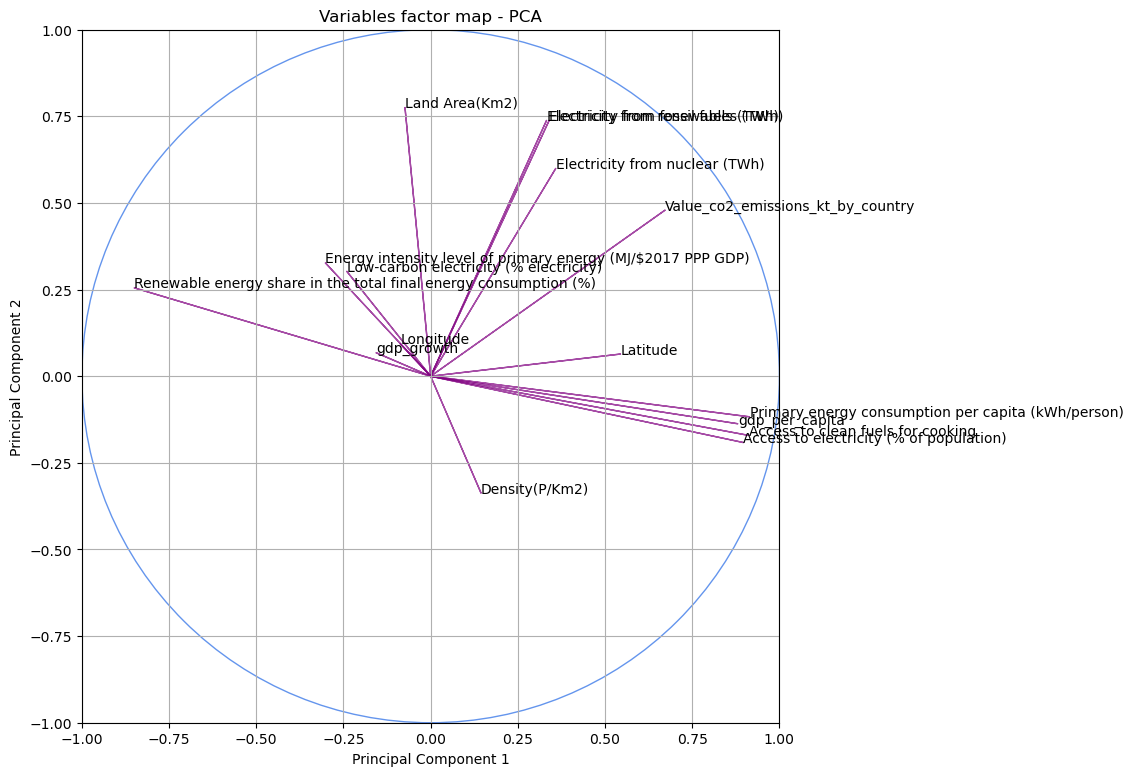

In [25]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data_standardise.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()

## Analyse : 
La projection dans les deux premières composantes nous permet de tirer quelques conclusions. 

Tout d'abord, on voit que la majorité des variables semblent bien projetées en effet les droites sont proches du bord du cercle, à part les variables "Density", "Longitude", "Low-carbon electricity (% electricity)" et "Energy intensity level of primary energy (MJ/$2017 PPP GDP)". 

On voit également qu'il ya une certaine corrélation entre les variables :
- "Access to electricity (% of population)" et "Access to clean fuels for cooking"

- "Electricity from renewables (TWh)", "Electricity from fossil fuels (TWh)" et "Value_co2_emissions_kt_by_country"

De plus les variables : "Renewable energy share in the total final energy consumption (%)" et "Primary energy consumption per capita (kWh/person)" sont anti-corrélées car éloignées d'un angle de 180° sur le cercle.

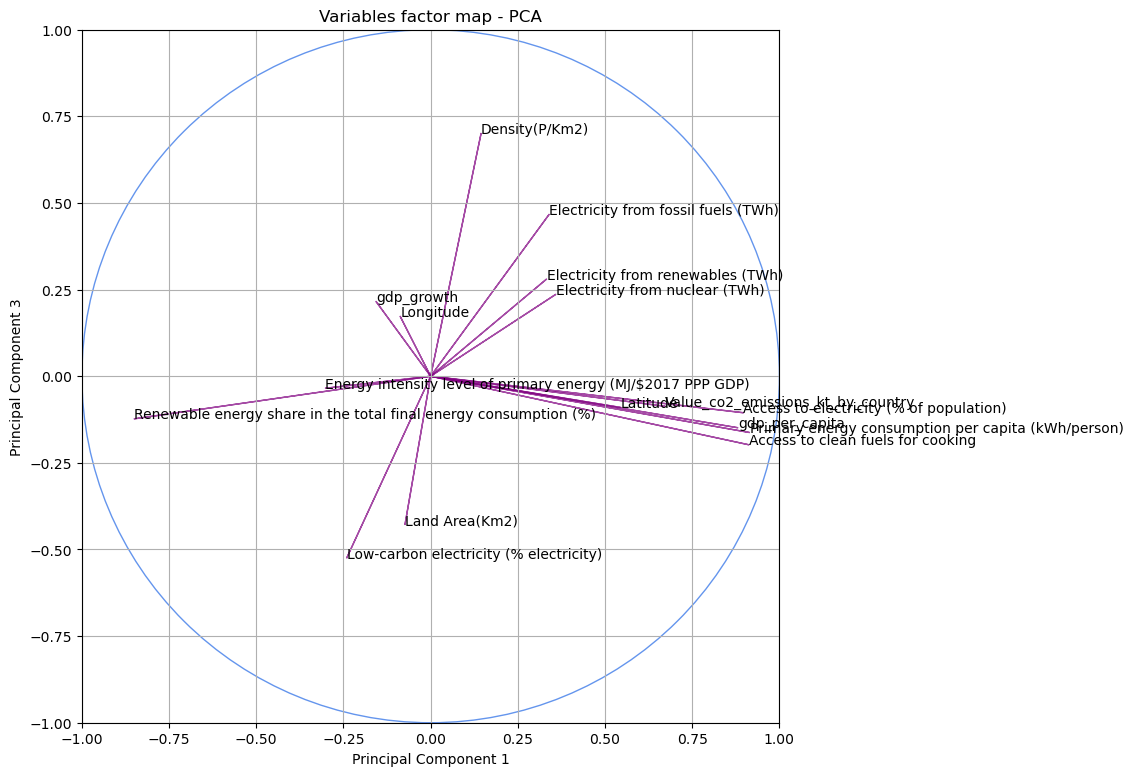

In [26]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[2] * np.sqrt(pca.explained_variance_[2])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data_standardise.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')

plt.grid(True)
plt.show()

En projettant les données standardisées dans le plan de la première et troisième composantes on obtient des résultats bien différents. Globalement on peut dire que les données sont moins bien projetées car éloignées du bord du cercle. 

Au niveau de corrélation :
- "Electricity from fossil fuels (TWh)" et "Value_co2_emissions_kt_by_country" sont très corrélées 

- il en est de meme pour : "Energy intensity level of primary energy" et "Low-carbon electricity " 


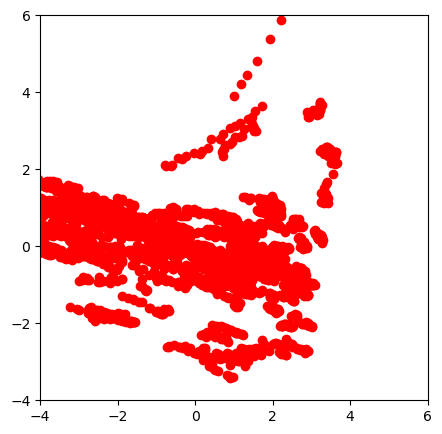

In [27]:
## Représentation des individus
plt.figure(figsize=(5,5))
for i, j, nom in zip(data_pca[:,0], data_pca[:,1], data_standardise["Value_co2_emissions_kt_by_country"]):
    color = "red" if nom  else "blue"
    plt.plot(i, j, "o",color=color)
plt.axis((-4,6,-4,6))  
plt.show()

# A faire:
- méthode des k-means ? fait en TP mais je sais pas si c'est vrt demandé

/tmp/ipykernel_4993/3716139390.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma')
/tmp/ipykernel_4993/3716139390.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


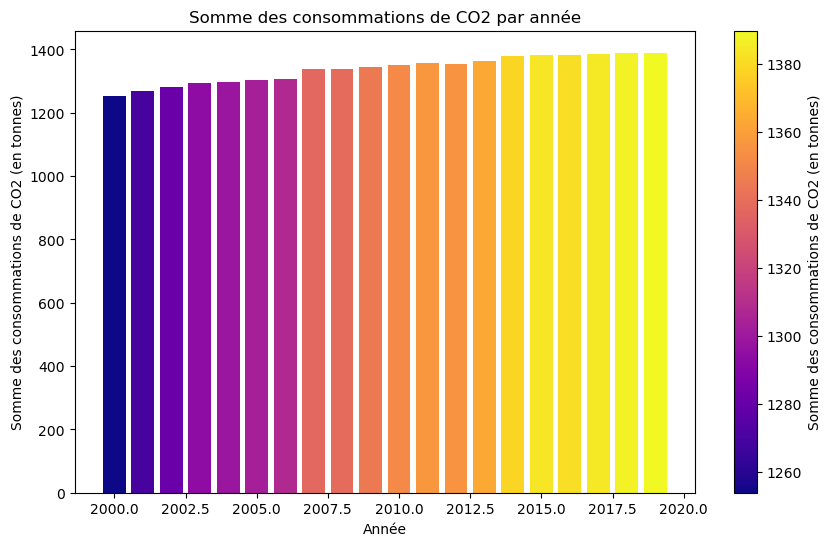

In [28]:

from matplotlib import colormaps
from matplotlib.cm import ScalarMappable

df_somme_annee = data.groupby('Year')['Value_co2_emissions_kt_by_country'].sum().reset_index()

df_somme_annee = df_somme_annee.drop(df_somme_annee.index[-1])

cmap = plt.cm.get_cmap('plasma')

# Normalisation des valeurs pour correspondre à la colormap
norm = plt.Normalize(df_somme_annee['Value_co2_emissions_kt_by_country'].min(), df_somme_annee['Value_co2_emissions_kt_by_country'].max())

plt.figure(figsize=(10, 6))
plt.bar(df_somme_annee['Year'],df_somme_annee['Value_co2_emissions_kt_by_country'],color=cmap(norm(df_somme_annee['Value_co2_emissions_kt_by_country'])))
plt.xlabel('Année')
plt.ylabel('Somme des consommations de CO2 (en tonnes)')
plt.title('Somme des consommations de CO2 par année')

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Somme des consommations de CO2 (en tonnes)')

plt.show()


## Modélisation

Nous nous intéressons maintenant à la prediction de la variable quantitative "**Value-co2-emissions**" 

Nous commençons par créer deux échantillons différents; l'un sera appelé l'échantillon d'apprentissage, il nous permettra d'entraîner nos différents modèles. L'autre, l'échantillon de test, nous permettra de tester nos résultats. 

In [29]:
#il faut créer dfC par concaténation mais j'ai pas trop compris 

#cf tp pic ozone 
""""
ozoneDum=pd.get_dummies(ozone[["JOUR","STATION"]])
del ozoneDum["JOUR_0"]
ozoneQuant=ozone[["MOCAGE","TEMPE","VentMOD","VentANG","SRMH2O","LNO2","LNO"]]
dfC=pd.concat([ozoneDum,ozoneQuant],axis=1)
dfC.head()

from sklearn.model_selection import train_test_split  
X_train,X_test,Yb_train,Yb_test=train_test_split(dfC,Yb,test_size=200,random_state=11)
X_train,X_test,Yr_train,Yr_test=train_test_split(dfC,Yr,test_size=200,random_state=11)

"""
from sklearn.model_selection import train_test_split

X = data.drop("Value_co2_emissions_kt_by_country", axis=1)
y = data['Value_co2_emissions_kt_by_country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train :', len(X_train)) 
print('X_test :', len(X_test)) 
print('y_train :', len(y_train)) 
print('y_test :', len(y_test)) 


X_test.head()

X_train : 2294
X_test : 574
y_train : 2294
y_test : 574


Entity  Year  Access to electricity (% of population)  \
573       Cambodia  2006                                 32.40758   
3083  South Africa  2009                                 82.60000   
1005       Ecuador  2018                                 98.70000   
854           Cuba  2014                                 98.42399   
3423        Uganda  2005                                  8.90000   

      Access to clean fuels for cooking  \
573                                 7.6   
3083                               75.4   
1005                               94.5   
854                                92.7   
3423                                0.8   

      Renewable energy share in the total final energy consumption (%)  \
573                                               78.01                  
3083                                              10.97                  
1005                                              16.33                  
854                                               23.16                  
3423                                              94.11                  

      Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
573                                  0.98                            0.00   
3083                               218.17                           11.57   
1005                                 7.97                            0.00   
854                                 16.52                            0.00   
3423                                 0.11                            0.00   

      Electricity from renewables (TWh)  \
573                                0.13   
3083                               1.86   
1005                              21.06   
854                                1.80   
3423                               1.84   

      Low-carbon electricity (% electricity)  \
573                                11.711712   
3083                                5.798791   
1005                               72.545640   
854                                 9.825328   
3423                               94.358970   

      Primary energy consumption per capita (kWh/person)  \
573                                            6.875228    
3083                                          10.254119    
1005                                           9.400974    
854                                            9.328775    
3423                                           6.201458    

      Energy intensity level of primary energy (MJ/$2017 PPP GDP)  gdp_growth  \
573                                            1.669592             10.771084   
3083                                           2.276241             -1.538089   
1005                                           1.131402              1.289292   
854                                            0.476234              1.047577   
3423                                           2.533697              6.332565   

      gdp_per_capita  Density(P/Km2)  Land Area(Km2)   Latitude   Longitude  
573         6.291107        4.553877       12.106446  12.565679  104.990963  
3083        8.784581        3.891820       14.013615 -30.559482   22.937506  
1005        8.747659        4.262680       12.555183  -1.831239  -78.183406  
854         8.872535        4.663439       11.616023  21.521757  -77.781167  
3423        5.810337        5.433722       12.392710   1.373333   32.290275

Cette étape est primordiale, en effet nous testerons donc nos modèles sur des données qui n'auront pas servi à les élaborer. (cf cours si chose à rajouter)

## Modèle de régression linéaire

### Modèle de régression linéaire avec et sans pénalisation :  

pas besoin de standardiser les données avant un modèle linéaire MAIS on doit le faire pour SVM !

    - on ne doit avoir que les var quantitatives

pertinent de faire un affichage de la valeur de C02 en fonction de l'électricité issue des énergies fossiles ?? (grosse correlation)

In [30]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

colonnes_quantitatives = [col for col in data.columns if col not in ['Entity', 
                                                                     'Year', 
                                                                     'Value_co2_emissions_kt_by_country',
                                                                     'Electricity from fossil fuels (TWh)']]
#on enelève ici la variable 'Electricity from fossil fuels (TWh)' car elle possède une forte corrélation avec la variable que l'on 
#souhaite prédire


# Créer un nouvel DataFrame avec seulement les colonnes quantitatives
X_train_quanti = X_train[colonnes_quantitatives]
X_test_quanti = X_test[colonnes_quantitatives]

X_train_quanti.head()
#y_train_quanti = y_train[colonnes_quantitatives]
#y_test_quanti = y_test[colonnes_quantitatives]

Access to electricity (% of population)  \
2485                               100.000000   
2335                               100.000000   
858                                 99.521210   
811                                 99.563515   
2852                                52.587242   

      Access to clean fuels for cooking  \
2485                              100.0   
2335                              100.0   
858                                93.5   
811                                93.6   
2852                                0.4   

      Renewable energy share in the total final energy consumption (%)  \
2485                                              57.42                  
2335                                               3.85                  
858                                               24.11                  
811                                               37.80                  
2852                                              55.34                  

      Electricity from nuclear (TWh)  Electricity from renewables (TWh)  \
2485                            0.00                             130.42   
2335                            3.97                              11.19   
858                             0.00                               2.00   
811                             0.00                               8.88   
2852                            0.00                               0.01   

      Low-carbon electricity (% electricity)  \
2485                               97.861480   
2335                               12.727731   
858                                10.183300   
811                                87.833830   
2852                               33.333336   

      Primary energy consumption per capita (kWh/person)  \
2485                                          11.549372    
2335                                          11.162637    
858                                            9.192091    
811                                            9.360352    
2852                                           7.631080    

      Energy intensity level of primary energy (MJ/$2017 PPP GDP)  gdp_growth  \
2485                                           1.474763              1.034073   
2335                                           1.388791              1.342739   
858                                            0.314811              2.248480   
811                                            0.883768              2.494766   
2852                                           1.499623              2.376878   

      gdp_per_capita  Density(P/Km2)  Land Area(Km2)   Latitude  Longitude  
2485       11.541644        2.708050       12.687887  60.472024   8.468946  
2335       10.838601        6.230481       10.634484  52.132633   5.291266  
858         9.085253        4.663439       11.616023  21.521757 -77.781167  
811         9.282111        4.605170       10.841540   9.748917 -83.753428  
2852        6.358931        5.488938        6.728629   0.330192   6.733343

In [31]:
# Modèle linaire sans pénalisation

0.9811450627713638
MSE= 0.1401775687444167
[ 8.98588112e-03 -2.56346892e-03 -9.76609497e-03 -2.62521961e-04
  1.81611075e-04 -4.71334999e-03  5.33972599e-01  1.58006819e-01
 -6.05673346e-03  2.37304655e-01  9.31506246e-01  1.00974759e+00
  1.92483529e-03  2.46510112e-04]


Text(0.5, 1.0, 'Coefficients du modèle lasso')

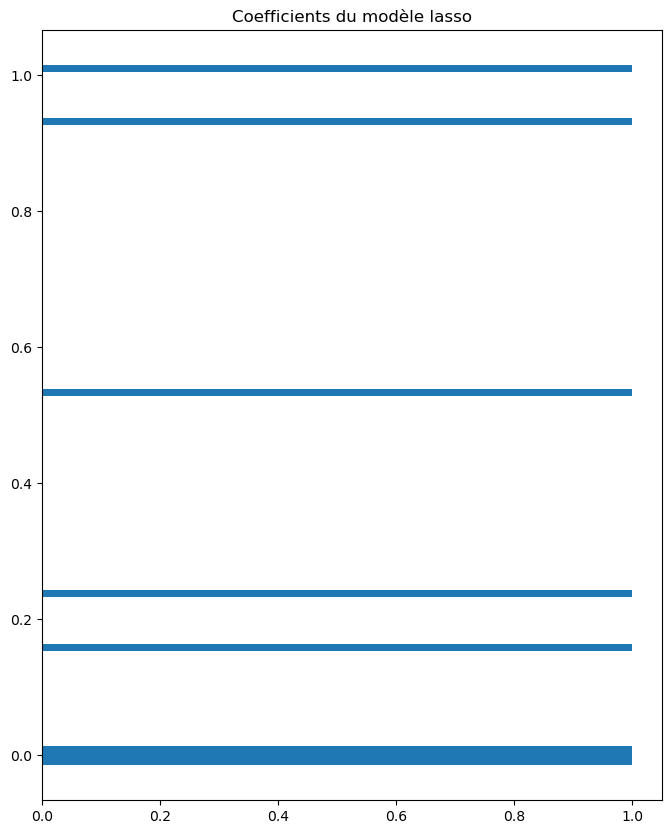

In [32]:
from sklearn.linear_model import LinearRegression

#on réalise un modèle linéaire simple sur nos données d'entrainement 
reg = LinearRegression().fit(X_train_quanti, y_train)

#on affiche le score d'ajustement du modèle
print(reg.score(X_train_quanti, y_train))

#on teste le modèle de prédiction sur notre échantillon test
prediction = reg.predict(X_test_quanti)

#on affiche l'erreur du modèle entre les valeurs qu'ils présdient et celles observées.
print("MSE=",mean_squared_error(y_test,prediction))

#on affiche les coefficient de notre modèle linéaire simple
print(reg.coef_)

imp_coef = np.sort(reg.coef_)

plt.rcParams['figure.figsize'] = (8.0, 10.0)
plt.barh(imp_coef,width=1,height=0.01)
plt.title(u"Coefficients du modèle lasso")


In [33]:
# Modèle linaire avec pénalisation LASSO 

On applique ici une pénalisation type LASSO à notre modèle linéaire afin d'éviter le sur-ajustement.

In [34]:
from sklearn import linear_model

#on réalise un modèle linéaire simple avec pénalisation de type LASSO sur nos données d'entrainement 

regLasso = linear_model.Lasso()
regLasso.fit(X_train_quanti,y_train)

#on teste le modèle de prédiction sur notre échantillon test
prev=regLasso.predict(X_test_quanti)

#on affiche l'erreur du modèle entre les valeurs qu'ils présdient et celles observées.
print("MSE=",mean_squared_error(y_test,prev))

#celle-ci semble beaucoup plus importante qu'avec le modèle simple 

MSE= 1.3977012982639307


In [35]:
from sklearn.metrics import r2_score

#on affiche ici le score d'ahjustement du modèle avec pénalisation
print("R2=",r2_score(y_test,prev))

R2= 0.751928826701093


In [36]:
#on optimise le coeff de pénalisation par validation croisée, afin d'espérer obtenir un erreur plus faible et un meilleur score:

from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.005,0.01,0.05,0.1,0.3,0.5,1,2,5,10]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train_quanti, y_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.980588, Meilleur paramètre = {'alpha': 0.005}


Avec la valeur optimisée d'alpha on obtient alors une autre valeur du MSE:

In [37]:
prev=regLassOpt.predict(X_test_quanti)

#en effet l'erreur avec le coefficient de pénalisation est beaucoup plus petite, ce qui optimise notre résultat
print("MSE=",mean_squared_error(prev,y_test))
print("R2=",r2_score(y_test,prev))

MSE= 0.13941161346399214
R2= 0.9752565139873143


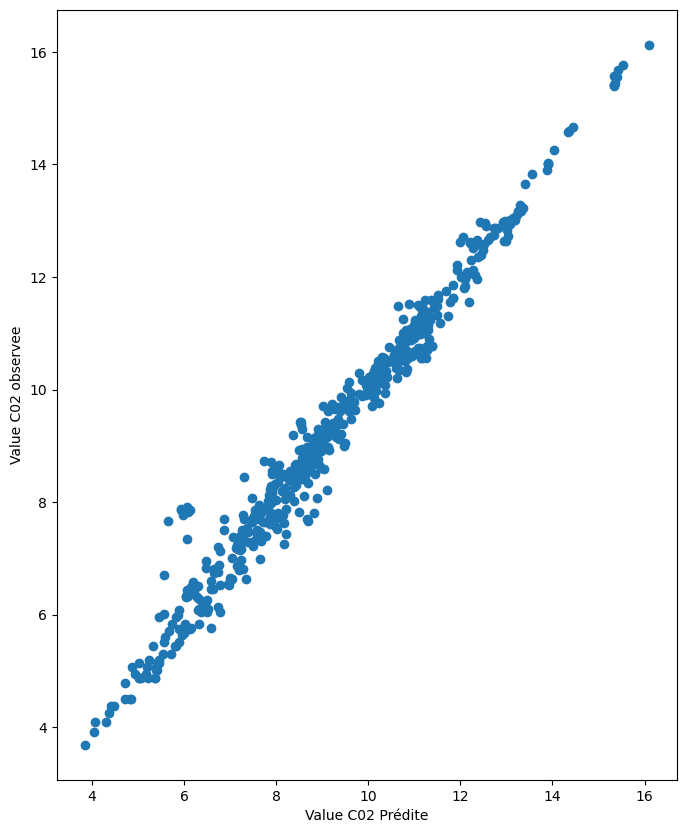

In [38]:
#Affichage du modèle linéaire à pénalisation en fonction de l'échantillon de test
plt.plot(prev,y_test,"o")
plt.xlabel(u"Value C02 Prédite")
plt.ylabel("Value C02 observee")
plt.show()

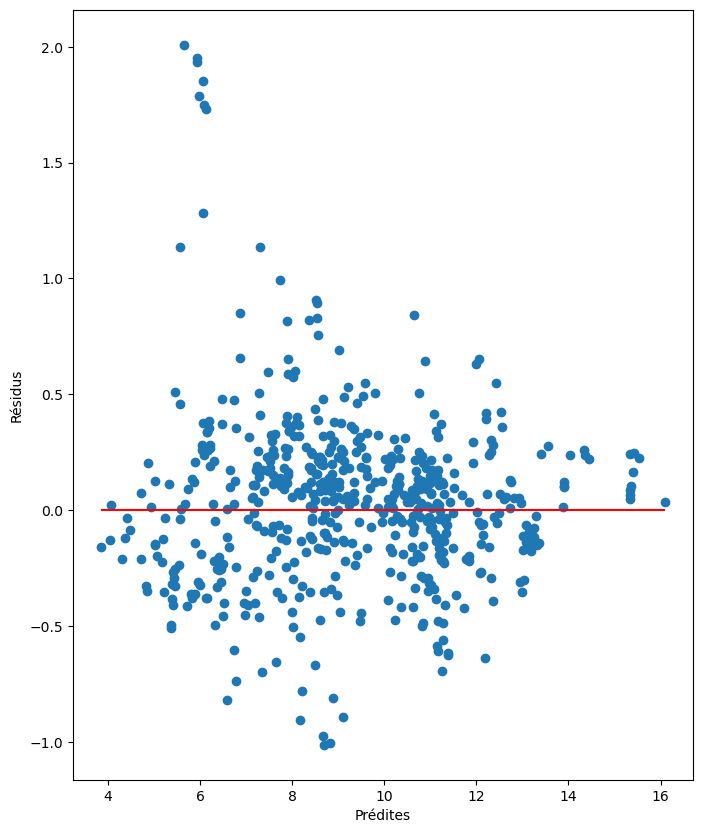

In [39]:
#Affichage des résidus :

plt.plot(prev,y_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,min(prev),max(prev),colors='r')
plt.show()


Analyse du graphe des résidus : 
   
   - quelques outliers 
   - globalement de part et d'autres de la moyenne ou mediane ?
   - pas de forme de banane ou de trompette
    
 Conclusion : ? 

In [40]:
# Calcul des différents coefficients
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(X_train_quanti,y_train)
model_lasso.coef_

array([ 8.84461146e-03, -2.13278588e-03, -9.46787882e-03, -2.03565978e-04,
        2.15131594e-04, -4.79933684e-03,  5.39520068e-01,  1.23697860e-01,
       -5.93476262e-03,  2.20510689e-01,  9.23949160e-01,  1.00549622e+00,
        2.09292125e-03,  3.02685534e-04])

In [41]:
#Observation des coefficients garder par la pénalisation Lasso dans le modèle linaire
coef = pd.Series(model_lasso.coef_, index = X_train_quanti.columns)
print("Lasso conserve ", str(sum(coef != 0)), " variables et en supprime ",  str(sum(coef == 0)))

#et bien c'est pas foufou la 

Lasso conserve  14  variables et en supprime  0


Text(0.5, 1.0, 'Coefficients du modèle lasso')

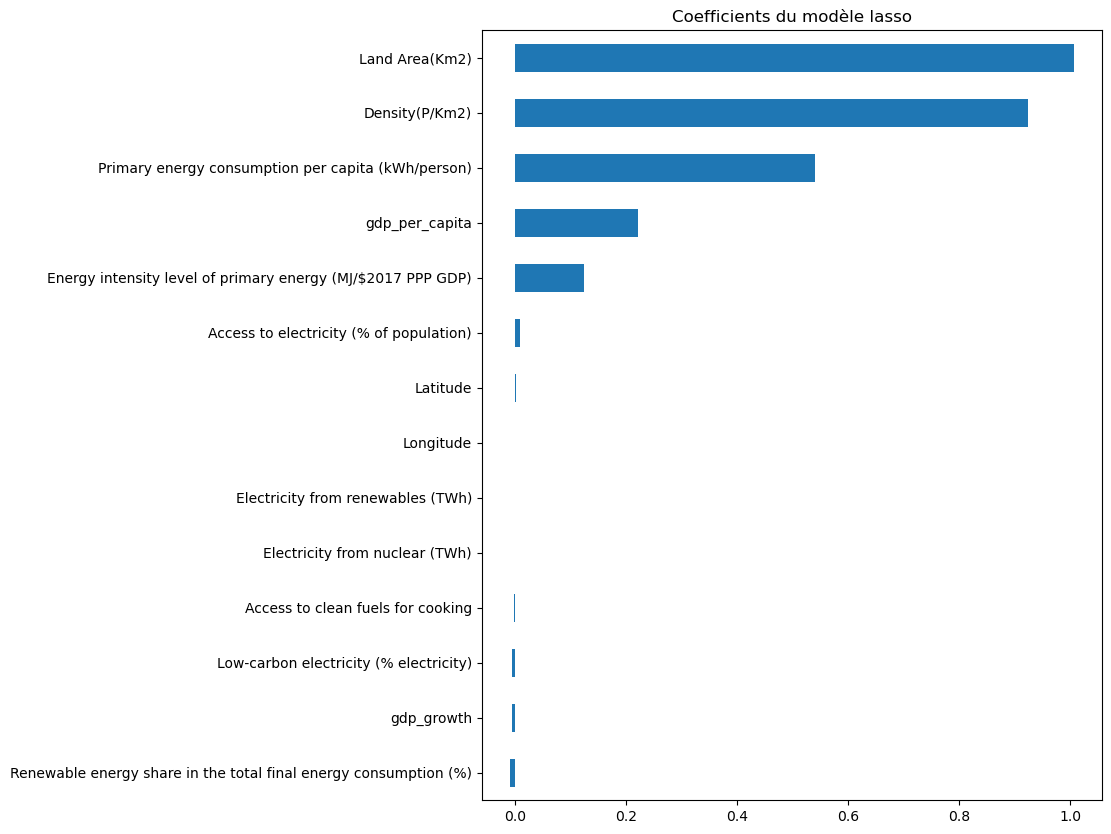

In [42]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

Analyse : quelles sont les conséquences de la pénalisation LASSO? Quel est l'effet de chacune des variables sur la valeur du C02?
On voit que la pénalisation LASSO crée un modèle basée sur une grande importance des coefficient reliés aux variables "Area" et "Density" comme le modèle linéaire simple. Cependant, le coefficient lié à "Density" prend ici un peu moins d'importance.

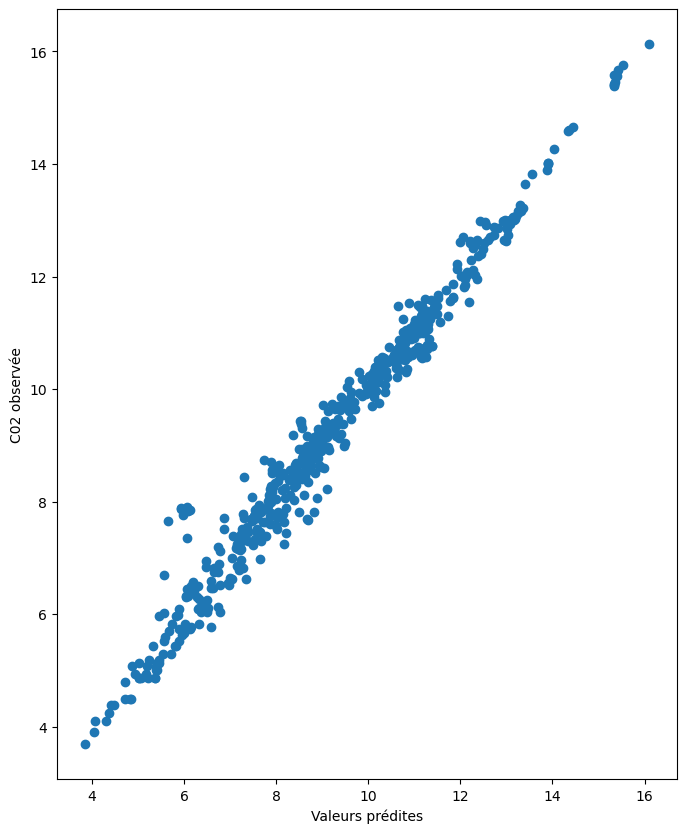

In [43]:
plt.plot(prev,y_test,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"C02 observée")
"""
plt.hlines(150,50,300)
plt.vlines(150,0,300)"""
plt.show()


#quelle est la diff avec l'autre graphe?
#serait-ce pertinent de superposer les graphes des deux modèles linéaire avec et sans pénalisation afin de les comparer?

In [44]:
# Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(prev>150,y_test>150)
print(table)

#valeur à changer pour le 150 mais je sais pas trop quoi mettre vu les ordres de grandeur ??

Value_co2_emissions_kt_by_country  False
row_0                                   
False                                574


Autre library utilisée dans la régularisation de la pénalisation LASSO : 


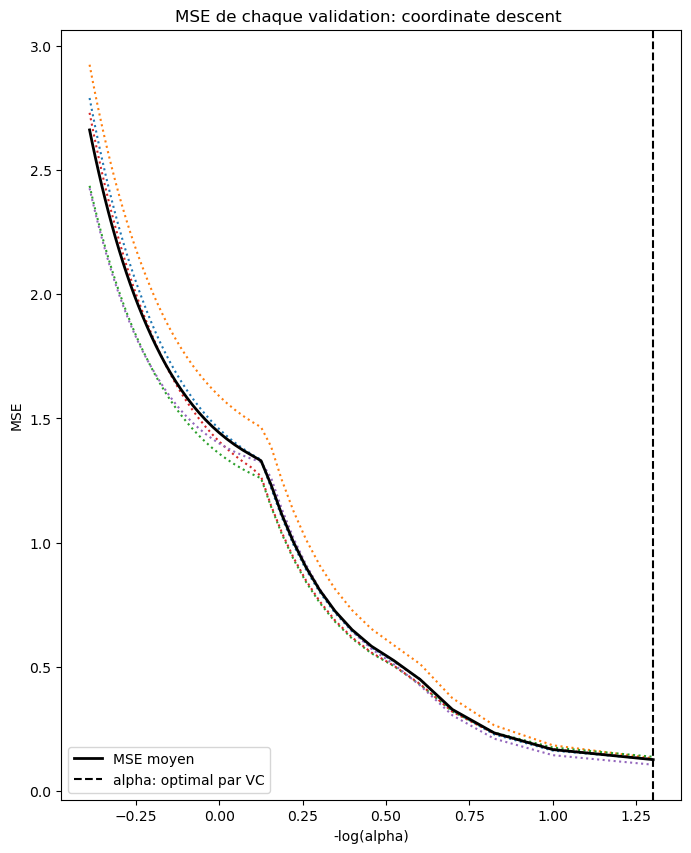

In [45]:
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=5, alphas=np.array(range(1,50,1))/20.,n_jobs=-1,random_state=13).fit(X_train_quanti,y_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

Chemin de régularisation :

In [46]:
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(X_train_quanti,y_train, alphas=np.array(range(1,50,1))/20.,)


plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.show()

In [47]:
 # faire l'analyse des graphes 

### Modèle de régression linéaire avec et sans sélection de variables :

In [48]:
#Modèle de régression linéaire sans sélection de variables :

In [49]:
#on réalise un modèle linéaire simple sur nos données d'entrainement 
reg = LinearRegression().fit(X_train_quanti, y_train)

#on affiche le score d'ajustement du modèle
print(reg.score(X_train_quanti, y_train))

#on teste le modèle de prédiction sur notre échantillon test
prediction = reg.predict(X_test_quanti)

#on affiche l'erreur du modèle entre les valeurs qu'ils présdient et celles observées.
print("MSE=",mean_squared_error(y_test,prediction))

#on affiche les coefficient de notre modèle linéaire simple
print(reg.coef_)

imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle linéaire simple")


0.9811450627713638
MSE= 0.1401775687444167
[ 8.98588112e-03 -2.56346892e-03 -9.76609497e-03 -2.62521961e-04
  1.81611075e-04 -4.71334999e-03  5.33972599e-01  1.58006819e-01
 -6.05673346e-03  2.37304655e-01  9.31506246e-01  1.00974759e+00
  1.92483529e-03  2.46510112e-04]


Text(0.5, 1.0, 'Coefficients du modèle linéaire simple')

In [50]:
# Modèle de régression linéaire avec sélection de variables :
# Pour faire de la sélection de modèle on utilise par le critère AIC 
#qui va nous donner un modèle qui permet de minimiser un maximum le critère AIC 

import statsmodels.api as sm

# X_train_quanti
# X_test_quanti
# y_train
# y_test

#print(X_train_quanti.columns)

# Ajouter une colonne de biais (constante)
X_train_quanti_AIC = sm.add_constant(X_train_quanti)

#print(X_train_quanti_AIC.columns)

# Modèle initial avec toutes les variables
model = sm.OLS(y_train, X_train_quanti_AIC).fit()
print("AIC:", model.aic, "\nNo removed feature (full model)\n")

# Afficher les résultats
#print(model.summary())

# Sélection de variables basée sur AIC
while len(model.params) > 1 :  # Tant qu'il reste plus d'une variable
    max_aic = model.aic
    worst_feature = None
    for feature in model.params.index:
        if feature != 'const':  # Ne pas supprimer la constante
            temp_model = sm.OLS(y_train, X_train_quanti_AIC.drop(columns=[feature])).fit()
            if temp_model.aic > max_aic:
                max_aic = temp_model.aic
                worst_feature = feature
    #print(worst_feature)
    if worst_feature:
        X_train_quanti_AIC = X_train_quanti_AIC.drop(columns=[worst_feature])
        model = sm.OLS(y_train, X_train_quanti_AIC).fit()
        print("AIC:", model.aic, "\nRemoved feature:", worst_feature,"\n")
    else:
        break

AIC: 1422.204687652651 
No removed feature (full model)

AIC: 8990.784557341423 
Removed feature: Land Area(Km2) 

AIC: 9221.726204331906 
Removed feature: Electricity from renewables (TWh) 

AIC: 9452.191679204763 
Removed feature: Electricity from nuclear (TWh) 

AIC: 9549.71645703225 
Removed feature: Latitude 

AIC: 9623.248189181873 
Removed feature: Longitude 

AIC: 9693.189336742142 
Removed feature: Energy intensity level of primary energy (MJ/$2017 PPP GDP) 

AIC: 9727.228316795332 
Removed feature: Primary energy consumption per capita (kWh/person) 

AIC: 9751.08001729484 
Removed feature: gdp_per_capita 

AIC: 9797.156145373076 
Removed feature: Access to clean fuels for cooking 

AIC: 9880.77106972903 
Removed feature: Access to electricity (% of population) 

AIC: 10492.669888116921 
Removed feature: Renewable energy share in the total final energy consumption (%) 

AIC: 10497.232276483935 
Removed feature: Density(P/Km2) 

AIC: 10501.067479366571 
Removed feature: Low-car

In [51]:
#bon la méthode descendante n'est pas implémentée en Python .... concernant la sélection de modèle AIC
# une autre alternative de l'anova c'est de créer des modèles avec les variables importantes et de les comparer 

In [52]:
"""
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Créez vos modèles à comparer
model1 = ols('Value_co2_emissions_kt_by_country ~ Density(P/Km2)', data=X_train_quanti).fit()
#model2 = ols('Value_co2_emissions_kt_by_country ~ Density(P/Km2) + Land Area(Km2) + Primary energy consumption per capita (kWh/person)', data=X_train_quanti).fit()

# Effectuez l'ANOVA pour comparer les modèles
anova_results = sm.stats.anova_lm(model1, model2)

# Affichez les résultats de l'ANOVA
print(anova_results)
"""

"\nimport statsmodels.api as sm\nfrom statsmodels.formula.api import ols\n\n# Créez vos modèles à comparer\nmodel1 = ols('Value_co2_emissions_kt_by_country ~ Density(P/Km2)', data=X_train_quanti).fit()\n#model2 = ols('Value_co2_emissions_kt_by_country ~ Density(P/Km2) + Land Area(Km2) + Primary energy consumption per capita (kWh/person)', data=X_train_quanti).fit()\n\n# Effectuez l'ANOVA pour comparer les modèles\nanova_results = sm.stats.anova_lm(model1, model2)\n\n# Affichez les résultats de l'ANOVA\nprint(anova_results)\n"

## Support Vector Machine

La première étape consiste à standardiser nos données afin de pouvoir réaliser la SVM.

In [53]:
#Objectif :  il faut calculer la prévision, les résidus et le MSE pour les diff noyaux

In [54]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train_quanti)  
Xr_train = scaler.transform(X_train_quanti)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test_quanti)

In [55]:
#nous sommes dans le cas de Regression donc nous utilisons SVR 
from sklearn.svm import SVR

"""
#svm_linear = SVR(kernel='linear')  # Utilisation du noyau linéaire
# ou
#svm_poly = SVR(kernel='poly')  # Utilisation du noyau polynomial
# ou
#svm_rbf = SVR(kernel='rbf')  # Utilisation du noyau RBF (par défaut)

#Premier cas : noyau lineaire celui utilisé par défaut 
param=[{"C":[0.1,1,10]}]

svm = GridSearchCV(SVR(kernel='linear'), param, cv=10, n_jobs=-1)

svmOpt = svm.fit(X_train_quanti, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))"""

'\n#svm_linear = SVR(kernel=\'linear\')  # Utilisation du noyau linéaire\n# ou\n#svm_poly = SVR(kernel=\'poly\')  # Utilisation du noyau polynomial\n# ou\n#svm_rbf = SVR(kernel=\'rbf\')  # Utilisation du noyau RBF (par défaut)\n\n#Premier cas : noyau lineaire celui utilisé par défaut \nparam=[{"C":[0.1,1,10]}]\n\nsvm = GridSearchCV(SVR(kernel=\'linear\'), param, cv=10, n_jobs=-1)\n\nsvmOpt = svm.fit(X_train_quanti, y_train)\n# paramètre optimal\nprint("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))'

In [56]:
"""
# erreur de prévision sur le test
print('erreur sur test set =', 1-svmOpt.score(X_test_quanti,y_test))

#Affichage du MSE. Le MSE est fait sur le test car si on fait sur le train on "triche", il faut tester sur un ensemble qu'il n'a jamais vu
y_pred = svmOpt.predict(X_test_quanti)

print("MSE=",mean_squared_error(y_test,y_pred))

#Affichage des résidus 
y_pred = svmOpt.predict(X_train_quanti)

residus = y_train - y_pred

# Tracer un graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residus)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Graphique des résidus')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.grid(True)
plt.show()"""

'\n# erreur de prévision sur le test\nprint(\'erreur sur test set =\', 1-svmOpt.score(X_test_quanti,y_test))\n\n#Affichage du MSE. Le MSE est fait sur le test car si on fait sur le train on "triche", il faut tester sur un ensemble qu\'il n\'a jamais vu\ny_pred = svmOpt.predict(X_test_quanti)\n\nprint("MSE=",mean_squared_error(y_test,y_pred))\n\n#Affichage des résidus \ny_pred = svmOpt.predict(X_train_quanti)\n\nresidus = y_train - y_pred\n\n# Tracer un graphique des résidus\nplt.figure(figsize=(10, 6))\nplt.scatter(y_pred, residus)\nplt.axhline(y=0, color=\'r\', linestyle=\'--\')\nplt.title(\'Graphique des résidus\')\nplt.xlabel(\'Prédictions\')\nplt.ylabel(\'Résidus\')\nplt.grid(True)\nplt.show()'

In [57]:
"""#Deuxieme cas : noyau polynomial celui utilisé par défaut 
param=[{"C":[0.1,1,10,100],
        'degree':[3,5,7],
        'gamma':['scale', 'auto'],
        'coef0':[0,0.1,0.5]}]

svm = GridSearchCV(SVR(kernel='linear'), param, cv=10, n_jobs=-1)

svmOpt = svm.fit(X_train_quanti, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))"""

'#Deuxieme cas : noyau polynomial celui utilisé par défaut \nparam=[{"C":[0.1,1,10,100],\n        \'degree\':[3,5,7],\n        \'gamma\':[\'scale\', \'auto\'],\n        \'coef0\':[0,0.1,0.5]}]\n\nsvm = GridSearchCV(SVR(kernel=\'linear\'), param, cv=10, n_jobs=-1)\n\nsvmOpt = svm.fit(X_train_quanti, y_train)\n# paramètre optimal\nprint("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))'

In [58]:
"""# erreur de prévision sur le test
print('erreur sur test set =', 1-svmOpt.score(X_test_quanti,y_test))

#Affichage du MSE. Le MSE est fait sur le test car si on fait sur le train on "triche", il faut tester sur un ensemble qu'il n'a jamais vu
y_pred = svmOpt.predict(X_test_quanti)

print("MSE=",mean_squared_error(y_test,y_pred))

#Affichage des résidus 
y_pred = svmOpt.predict(X_train_quanti)

residus = y_train - y_pred

# Tracer un graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residus)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Graphique des résidus')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.grid(True)
plt.show()"""

'# erreur de prévision sur le test\nprint(\'erreur sur test set =\', 1-svmOpt.score(X_test_quanti,y_test))\n\n#Affichage du MSE. Le MSE est fait sur le test car si on fait sur le train on "triche", il faut tester sur un ensemble qu\'il n\'a jamais vu\ny_pred = svmOpt.predict(X_test_quanti)\n\nprint("MSE=",mean_squared_error(y_test,y_pred))\n\n#Affichage des résidus \ny_pred = svmOpt.predict(X_train_quanti)\n\nresidus = y_train - y_pred\n\n# Tracer un graphique des résidus\nplt.figure(figsize=(10, 6))\nplt.scatter(y_pred, residus)\nplt.axhline(y=0, color=\'r\', linestyle=\'--\')\nplt.title(\'Graphique des résidus\')\nplt.xlabel(\'Prédictions\')\nplt.ylabel(\'Résidus\')\nplt.grid(True)\nplt.show()'

In [59]:
#Troisieme cas : noyau RBF celui utilisé par défaut 
"""
param=[{"C":[7,15,30,50,100,500],
        "gamma":['scale','auto'],
        "epsilon":[0.005,0.01,0.1,0.5]}]

svm = GridSearchCV(SVR(), param, cv=10, n_jobs=-1)

svmOpt = svm.fit(X_train_quanti, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))"""

svm = SVR(C=500, epsilon=0.01, gamma='scale')

svmOpt = svm.fit(X_train_quanti, y_train)

#Meilleur score = 0.988836, Meilleur paramètre = {'C': 500, 'epsilon': 0.01, 'gamma': 'scale'}

erreur sur test set = 0.012278561006131783
MSE= 0.06918079368457974


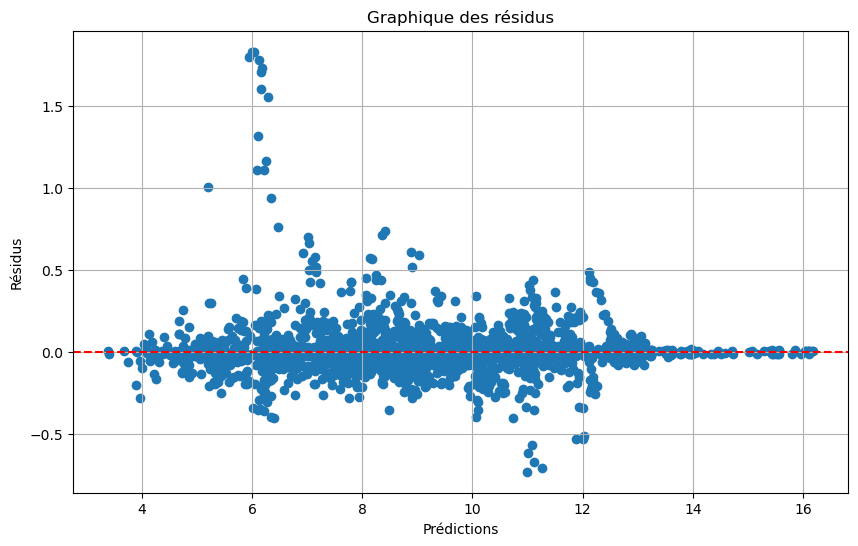

In [60]:
# erreur de prévision sur le test
print('erreur sur test set =', 1-svmOpt.score(X_test_quanti,y_test))

#Affichage du MSE. Le MSE est fait sur le test car si on fait sur le train on "triche", il faut tester sur un ensemble qu'il n'a jamais vu
y_pred = svmOpt.predict(X_test_quanti)

print("MSE=",mean_squared_error(y_test,y_pred))

#Affichage des résidus 
y_pred = svmOpt.predict(X_train_quanti)

residus = y_train - y_pred

# Tracer un graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residus)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Graphique des résidus')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.grid(True)
plt.show()

## ARBRE DE REGRESSION

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
# Optimisation de la profondeur de l'arbre

param={"splitter":["best","random"],
       "max_depth" : [1,3,5,7,9,11,12],
       "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
       "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
       "max_features":["log2","sqrt",None],
       "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_train_quanti, y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (treeOpt.best_score_,treeOpt.best_params_))

# Prédire les valeurs sur l'ensemble de test
predictions = treeOpt.predict(X_test_quanti)

# Calculer le score sur l'ensemble de test (par exemple, l'erreur quadratique moyenne)
mse = mean_squared_error(y_test, predictions)
print("Erreur quadratique moyenne sur l'ensemble de test:", mse)

#Meilleur score = 0.706866, Meilleur paramètre = {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
#Erreur quadratique moyenne sur l'ensemble de test: 1.7941451998985531


Meilleur score = 0.706866, Meilleur paramètre = {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
Erreur quadratique moyenne sur l'ensemble de test: 1.7941451998985545


0.26725587166741516 



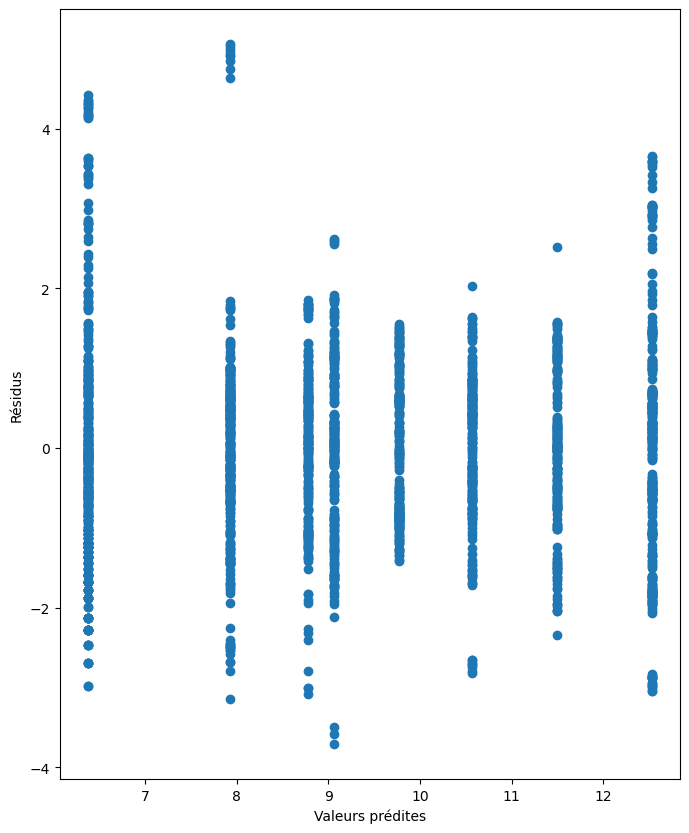

In [62]:
print(1-treeOpt.score(X_train_quanti,y_train),'\n')

# prévision de l'échantillon test
y_chap = treeOpt.predict(X_train_quanti)

plt.figure()
plt.plot(y_chap,y_train-y_chap,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Résidus")
plt.show()

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Créer et entraîner le modèle de Random Forest

param=[{"n_estimators" : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]}]
random_forest = GridSearchCV(RandomForestRegressor(criterion='squared_error',bootstrap=True, oob_score=True),param,cv=10)
random_forest.fit(X_train_quanti, y_train)

"""
random_forest = RandomForestRegressor(n_estimators=100)  # Vous pouvez ajuster n_estimators selon vos besoins
random_forest.fit(X_train_quanti, y_train)"""

# Prédire les valeurs sur l'ensemble de test
predictions = random_forest.predict(X_test_quanti)

# Calculer le score sur l'ensemble de test (par exemple, l'erreur quadratique moyenne)
mse = mean_squared_error(y_test, predictions)
print("Erreur quadratique moyenne sur l'ensemble de test:", mse)

KeyboardInterrupt: 

In [ ]:
# prévision de l'échantillon test
y_chap = random_forest.predict(X_train_quanti)

plt.figure()
plt.plot(y_chap,y_train-y_chap,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Résidus")
plt.show()

In [ ]:
rfFit=random_forest.fit(X_train_quanti, y_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train_quanti.shape[1]):
    print(X_train_quanti.columns[indices[f]], importances[indices[f]])
    
# Graphe des importances
plt.figure()
plt.title("Importance des variables")
plt.bar(range(X_train_quanti.shape[1]), importances[indices]);
plt.xticks(range(X_train_quanti.shape[1]), X_train_quanti.columns[indices],rotation=90);
plt.xlim([-1, X_train_quanti.shape[1]]);
plt.show()

In [ ]:
#Boosting 

In [ ]:
#Réseaux de neurones 

In [64]:
from sklearn.neural_network import MLPRegressor

In [89]:
#on a testé avec couche (100,100) mais le reseau est plus opti avec qu'une seule couche à 1000.
param_grid = [{"hidden_layer_sizes":list([(30,),(100,),(100,100,),(500,),(1000,)]),
               "activation":['identity', 'logistic', 'tanh', 'relu']}] #paramètre régissant le nombre de couches cachés
nnet = GridSearchCV(MLPRegressor(max_iter=2000),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(X_train_quanti, y_train)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.006135, Meilleur paramètre = {'activation': 'tanh', 'hidden_layer_sizes': (1000,)}


In [90]:
# Estimation de l'erreur de prévision sur le test
1-nnetOpt.score(X_test_quanti, y_test)

0.007023192980563198

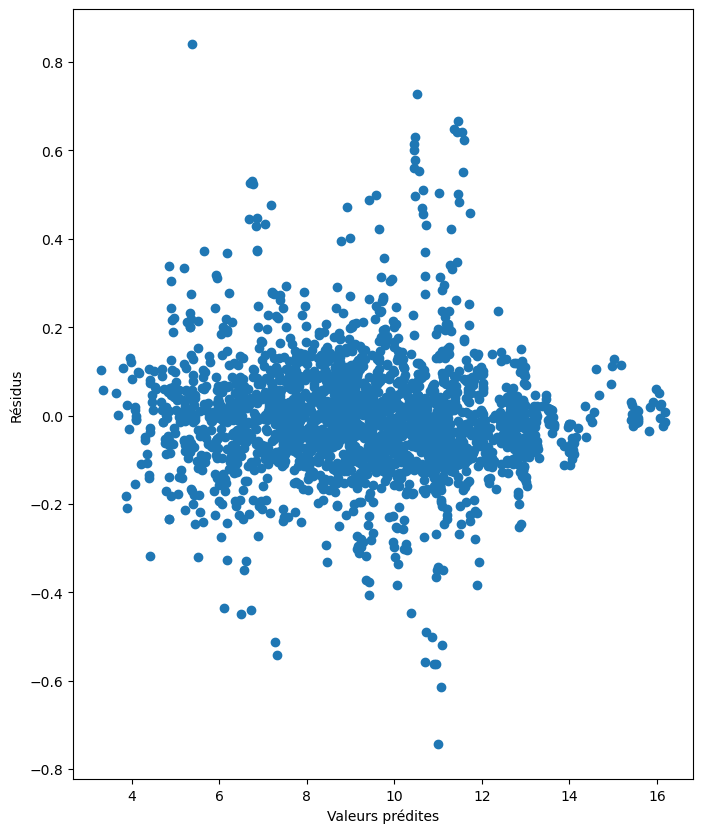

In [91]:
# prévision de l'échantillon test
y_chap = nnetOpt.predict(X_train_quanti)

plt.figure()
plt.plot(y_chap,y_train-y_chap,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Résidus")
plt.show()

## Pour plus tard : complétion des données manquantes 

In [6]:
#Algo de complétion 
#python propose bcp moins d'options que R sur les données manquantes et gère mal le mélange de données qualitatives et quantitatives :
#mais cela n'est pas grave car dans nos données les seules variables qualitative sont 'Entity' et 'Year' et elles ne comportent pas de MA
#en effet, on a vu à la question 2 :

data = pd.read_csv('global-data-on-sustainable-energy (1).csv')

data["Density(P/Km2)"] = data["Density(P/Km2)"].apply(lambda x : float(x.replace(',','')) if type(x)==str else x)

data.head()
 
nb_data_missing = data.isna().sum()
taux_data_missing = nb_data_missing/len(data)
print(nb_data_missing)

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [29]:
#on peut donc partir sur une méthode de complétion sur les variables quantitatives seulement 
colonnes_quanti = [col for col in data.columns if col not in ['Entity','Year']]
data_quanti = data[colonnes_quanti]

nrows = len(data_quanti)
missing_rates = 1-data_quanti.count(axis=0)/nrows
print(missing_rates)

data_non_na = data_quanti.dropna()

missing_rates.plot.bar()                  

Access to electricity (% of population)                             0.002740
Access to clean fuels for cooking                                   0.046314
Renewable-electricity-generating-capacity-per-capita                0.255138
Financial flows to developing countries (US $)                      0.572486
Renewable energy share in the total final energy consumption (%)    0.053165
Electricity from fossil fuels (TWh)                                 0.005755
Electricity from nuclear (TWh)                                      0.034530
Electricity from renewables (TWh)                                   0.005755
Low-carbon electricity (% electricity)                              0.011510
Primary energy consumption per capita (kWh/person)                  0.000000
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.056728
Value_co2_emissions_kt_by_country                                   0.117292
Renewables (% equivalent primary energy)                            0.585640

<Axes: >

On teste les différentes méthodes d'imputations 

#je sais pas si c'est vrt utile parce qu'on a pas de données test pour regarder les erreurs ??

## Imputation simple : 
On remplace les données manquantes par la moyenne des valeurs sur la colonnes correspondantes.

In [30]:
from sklearn.impute import SimpleImputer

data_mean = SimpleImputer().fit_transform(data_quanti)

data_meanImp=pd.DataFrame(data_mean, columns=data_quanti.columns)
data_meanImp.head()

Access to electricity (% of population)  Access to clean fuels for cooking  \
0                                 1.613591                                6.2   
1                                 4.074574                                7.2   
2                                 9.409158                                8.2   
3                                14.738506                                9.5   
4                                20.064968                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                      94224000.0   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                               0.31                               65.957440   
1                               0.50                               84.745766   
2                               0.56                               81.159424   
3                               0.63                               67.021280   
4                               0.56                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                 11.986707    3.441610    13283.774348   
1                                 11.986707    3.441610    13283.774348   
2                                 11.986707    3.441610      179.426579   
3                                 11.986707    8.832278      190.683814   
4                                 11.986707    1.414118      211.382074   

   Density(P/Km2)  Land Area(Km2)  Latitude  Longitude  


### Imputation avec KNN

In [47]:
from sklearn.impute import  KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
data_kNN = knn_imputer.fit_transform(data_quanti)

data_kNNImp=pd.DataFrame(data_kNN, columns=data_quanti.columns)

In [10]:
data_kNNImp.head()

#ici on remplace les valeurs manquantes par la moyenne des plus proches voisins

Access to electricity (% of population)  Access to clean fuels for cooking  \
0                                 1.613591                                6.2   
1                                 4.074574                                7.2   
2                                 9.409158                                8.2   
3                                14.738506                                9.5   
4                                20.064968                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                       7980000.0   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                               0.31                               65.957440   
1                               0.50                               84.745766   
2                               0.56                               81.159424   
3                               0.63                               67.021280   
4                               0.56                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                 12.143731    2.507265      561.905698   
1                                 12.143731    2.476795      572.664051   
2                                  2.793395    2.476795      179.426579   
3                                  2.793395    8.832278      190.683814   
4                                  2.793395    1.414118      211.382074   

   Density(P/Km2)  Land Area(Km2)  Latitude  Longitude  
0            60.0        652230.0  33.93911  67.709953  
1            60.0        652230.0  33.93911  67.709953  
2            60.0        652230.0  33.93911  67.709953  
3            60.0        652230.0  33.93911  67.709953  
4            

### Imputation par `missForest`
L'estimateur *ExtraTreesRegressor* entraîne une forêt aléatoire itérative et imite *missForest* dans R. *ExtraTreesRegressor* ajuste un certain nombre d'arbres aléatoires  et calcule la moyenne des résultats.

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
estimator_rf = ExtraTreesRegressor(n_estimators=20, random_state=0)
data_rf = IterativeImputer(estimator=estimator_rf, random_state=0, max_iter=600).fit_transform(data_quanti)

In [ ]:
data_rfImp=pd.DataFrame(data_rf, columns=data_quanti.columns)
data_rfImp.head()

#rq dans le tp ils calculent les erreurs des diff méthodes car ils ont ajouté des MA exprés pas notre cas non ? 
#ou alors j'ai pas bien compris et il fallait des test et training sets? (juste pour être sure)

### Prévision de la variable 'Value C02' sans données manquantes, par forêt aléatoire
Ici on reprend donc notre échantillon de la partie 1 où il n'y a pas de données manquantes (car on les a supprimé)

In [34]:
from sklearn.model_selection import train_test_split  
Yb = data_non_na['Value_co2_emissions_kt_by_country']
X_train,X_test,Yb_train,Yb_test=train_test_split(data_non_na,Yb,test_size=200,random_state=11)


In [35]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

In [37]:
from sklearn.ensemble import RandomForestRegressor
# prévision sans trous
forest = RandomForestRegressor(n_estimators=500)
# apprentissage
rfFit = forest.fit(X_train,Yb_train)
# erreur de prévision
# erreur de prévision sur le test
1-rfFit.score(X_test,Yb_test)

0.005588977903629888

### Prévision après imputation des données manquantes (par forêt aléatoire) avec données imputées par kNN

In [48]:
Yb = data_kNNImp['Value_co2_emissions_kt_by_country']
data_kNNImp

Access to electricity (% of population)  \
0                                    1.613591   
1                                    4.074574   
2                                    9.409158   
3                                   14.738506   
4                                   20.064968   
...                                       ...   
3644                                42.561730   
3645                                44.178635   
3646                                45.572647   
3647                                46.781475   
3648                                52.747670   

      Access to clean fuels for cooking  \
0                                   6.2   
1                                   7.2   
2                                   8.2   
3                                   9.5   
4                                  10.9   
...                                 ...   
3644                               29.8   
3645                               29.8   
3646                               29.9   
3647                               30.1   
3648                               30.4   

      Renewable-electricity-generating-capacity-per-capita  \
0                                                  9.22      
1                                                  8.86      
2                                                  8.47      
3                                                  8.09      
4                                                  7.75      
...                                                 ...      
3644                                              62.88      
3645                                              62.33      
3646                                              82.53      
3647                                              81.40      
3648                                              80.61      

      Financial flows to developing countries (US $)  \
0                                            20000.0   
1                                           130000.0   
2                                          3950000.0   
3                                         25970000.0   
4                                          7980000.0   
...                                              ...   
3644                                         30000.0   
3645                                       5570000.0   
3646                                         10000.0   
3647                                        250000.0   
3648                                         30000.0   

      Renewable energy share in the total final energy consumption (%)  \
0                                                 44.99                  
1                                                 45.60                  
2                                                 37.83                  
3                                                 36.66                  
4                                                 44.24                  
...                                                 ...                  
3644                                              81.90                  
3645                                              82.46                  
3646                                              80.23                  
3647                                              81.50                  
3648                                              81.90                  

      Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                    0.16                             0.0   
1                                    0.09                             0.0   
2                                    0.13                             0.0   
3                                    0.31                             0.0   
4                                    0.33                             0.0   
...                                   ...                             ...   
3644                                 3.50             

In [49]:
from sklearn.model_selection import train_test_split  
XnaImp_train,XnaImp_test,Yb_train,Yb_test=train_test_split(data_kNNImp,Yb,test_size=200,random_state=11)

In [50]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(XnaImp_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(XnaImp_test)

In [52]:
# prévision avec trous imputés
forest = RandomForestRegressor(n_estimators=500)
# apprentissage
rfFit = forest.fit(XnaImp_train,Yb_train)
# erreur de prévision
# erreur de prévision sur le test
1-rfFit.score(XnaImp_test,Yb_test)

0.00029828652607155615